# **Data Preparation**

### Loading libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
csvpath = r"data\vgsales.csv"
sales_df = pd.read_csv(csvpath, delimiter= ",")

# display basic info about the dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Data preprocessing

In [3]:
# check any missing values
sales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

* We have 271 years not referenced and 58 not referenced publishers. They represent a very small portion and the goal is to identify trends and patterns so we can eliminate them.

In [4]:
# drop all missing values from the dataset
sales_df = sales_df.dropna()

# check the removal of the values
sales_df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [5]:
sales_df['Year']= sales_df['Year'].astype(int)

In [6]:
sales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


* The data range from 1980 to 2020
* There seems to have a big impact from games that are not much sold. There is a vast gap between the 75% - max values

In [7]:
sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
sales_df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


* The data is ranked based on global sales

# **Market Analysis**

## I. Best-selling video games

In [9]:
# analyze which countries make up the largest and smallest portion of the sales
def percent(answer):
    print(round(sales_df[answer].sum()/sales_df['Global_Sales'].sum(),2))

ax=percent(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

NA_Sales       0.49
EU_Sales       0.27
JP_Sales       0.15
Other_Sales    0.09
dtype: float64


Before starting the games' sales it is important to note that :

   *  North America (NA) is responsible for 49% of the global sales
   * Europe (EU) is responsible for 27% of the global sales
   * Japan (JP) is responsible for 15% of the global sales
   * The other regions (the rest of the world) are responsible for 9% of the global sales

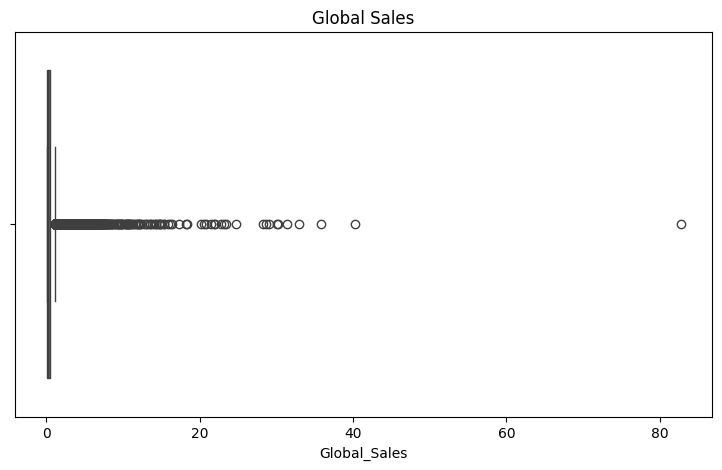

In [10]:
# check outliers : games that have performed extremely well
plt.figure(figsize=(9, 5))
sns.boxplot(x=sales_df['Global_Sales'])
plt.title('Global Sales')
plt.show()

* We can see that the vast majority of video games sales are very low, between 0 and 20 millions.
* We can notice a few outliers towards the top percentiles that have performed exceptionally well.
* The top selling video game worldwide shows astonishing performance, selling almost twice as much as the second video game. 

It is important to note that here the games are singled out by name. Video games published on different platforms will show a single result for each platform.
Let's see more details to see which license has sold best by grouping them by name :

In [11]:
# check most sold video games globally
top_vg = sales_df[['Name', 'Global_Sales','Publisher']].groupby(['Name', 'Publisher']).sum().reset_index().sort_values(by='Global_Sales', ascending=False)
top_vg = top_vg[['Name', 'Global_Sales', 'Publisher']]
top_vg.head(10)

,Name,Global_Sales,Publisher
11207,Wii Sports,82.74,Nintendo
3776,Grand Theft Auto V,55.92,Take-Two Interactive
9508,Super Mario Bros.,45.31,Nintendo
9902,Tetris,35.84,Nintendo
5665,Mario Kart Wii,35.82,Nintendo
11209,Wii Sports Resort,33.00,Nintendo
7477,Pokemon Red/Pokemon Blue,31.37,Nintendo
1267,Call of Duty: Modern Warfare 3,30.83,Activision
6839,New Super Mario Bros.,30.01,Nintendo
1263,Call of Duty: Black Ops II,29.72,Activision


* We have the confirmation that Wii Sports has sold exceptionally with approximately 30 millions sales more than the second (GTA V), representing the total sales of any game in the top 5 to 10
* Nintendo has published 70% of the 10 most selling games worldwide

Let's dig deeper and find the most-selling video games for each region :

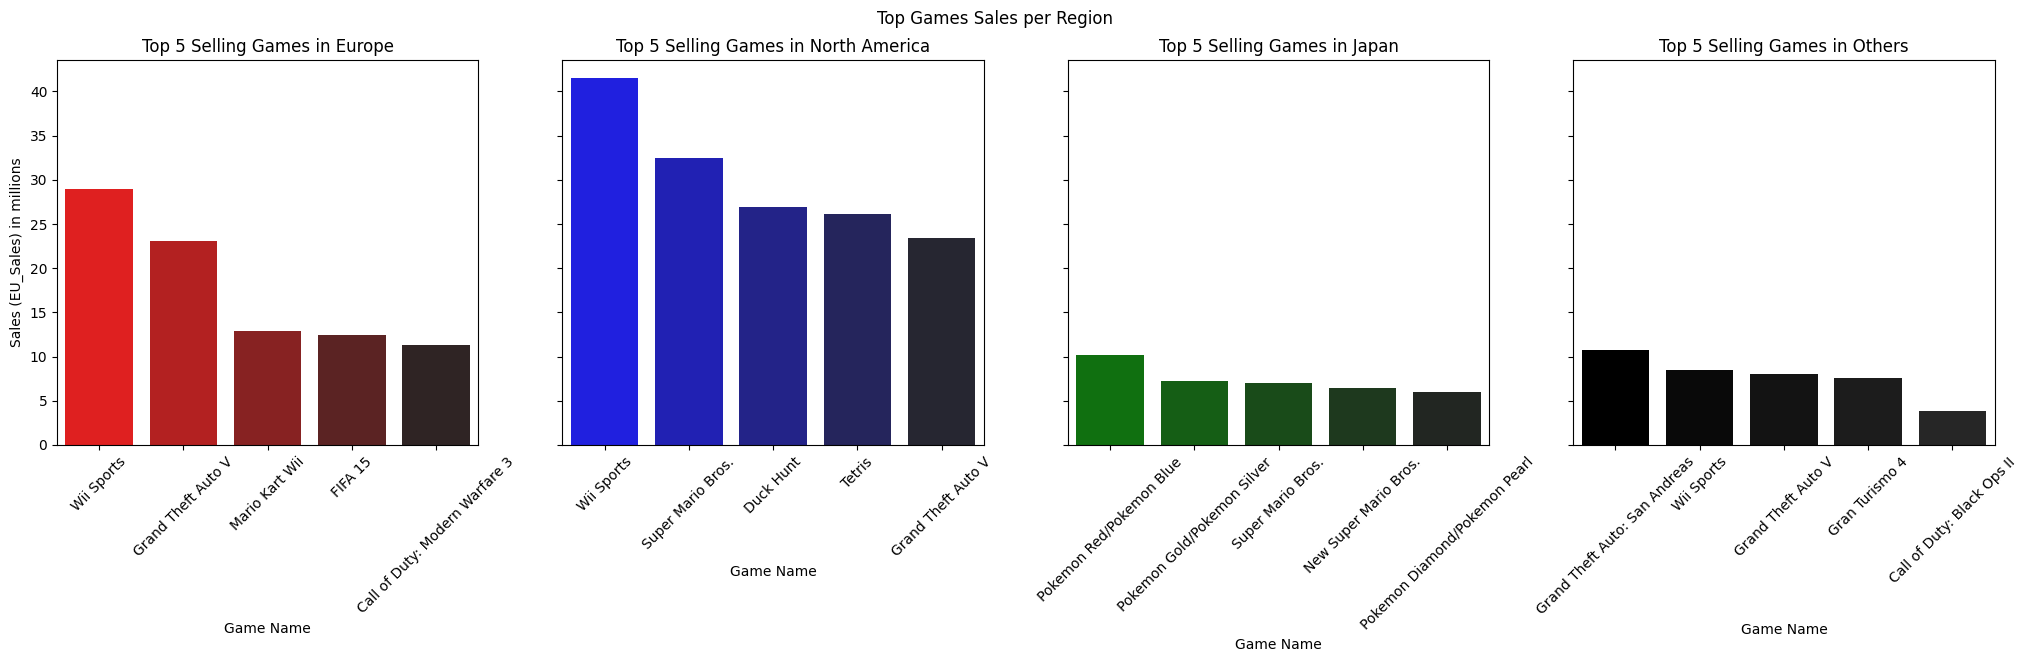

In [17]:
# create bar plot for the top 5 games in a specific region with styling
def plot_top_vg_by_region(region_sales, region_name, sales_column, top_n=5, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(25, 5))

    # define specific color palettes for each region
    color_palette = {
        'Europe': sns.dark_palette('red', n_colors=top_n, reverse=True),
        'North America': sns.dark_palette('blue', n_colors=top_n, reverse=True),
        'Japan': sns.dark_palette('green', n_colors=top_n, reverse=True),
        'Others': sns.dark_palette('black', n_colors=top_n, reverse=True)
    }

    # remove legend
    if ax.legend_ is not None:
        ax.legend_.remove()
        
    # plot the bar chart
    sns.barplot(ax=ax, x='Name', y=sales_column, hue='Name', data=region_sales.head(top_n), palette=color_palette[region_name], dodge=False)
    
    ax.set_title(f'Top {top_n} Selling Games in {region_name}')
    ax.set_xlabel('Game Name')
    ax.set_ylabel(f'Sales ({sales_column}) in millions')
    ax.tick_params(axis='x', rotation=45)


# create subplots
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=True)
fig.suptitle('Top Games Sales per Region')

# Europe
top_vg_EU = sales_df[['Name', 'EU_Sales']].groupby('Name').sum().reset_index().sort_values(by='EU_Sales', ascending=False)
plot_top_vg_by_region(top_vg_EU, 'Europe', 'EU_Sales', top_n=5, ax=axes[0])

# North America
top_vg_NA = sales_df[['Name', 'NA_Sales']].groupby('Name').sum().reset_index().sort_values(by='NA_Sales', ascending=False)
plot_top_vg_by_region(top_vg_NA, 'North America', 'NA_Sales', top_n=5, ax=axes[1])

# Japan
top_vg_JP = sales_df[['Name', 'JP_Sales']].groupby('Name').sum().reset_index().sort_values(by='JP_Sales', ascending=False)
plot_top_vg_by_region(top_vg_JP, 'Japan', 'JP_Sales', top_n=5, ax=axes[2])

# Others
top_vg_others = sales_df[['Name', 'Other_Sales']].groupby('Name').sum().reset_index().sort_values(by='Other_Sales', ascending=False)
plot_top_vg_by_region(top_vg_others, 'Others', 'Other_Sales', top_n=5, ax=axes[3])

# show plot
plt.show()



* We get more details about Wii Sports : while being the most-selling game in both Europe and North America, and close second in the "other" regions, it did not do that well in Japan
* Howerver, as we observed before, NA and EU representing together almost 80% of the global sales, it is natural that a common best-seller (here Wii Sports) is far ahead in a global ranking
* There is no (even remotely) similar set of games for the top of each region. Each region has different games being best seller

This confirms that if the objective is sales only, focusing on NA and/or EU might be a clever choice and this raises the question of regional preferences that we will answer later on.

## II. Platforms analysis

### 1. By Number of Games Released

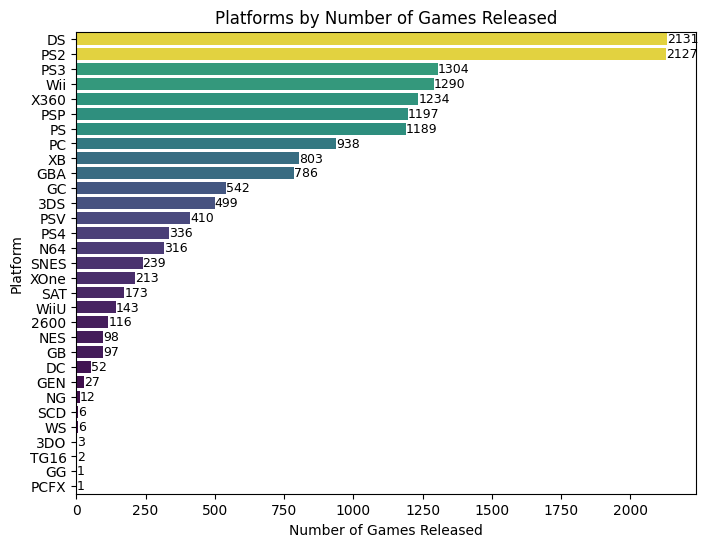

In [13]:
# count the number of games released for each platform
platform_counts = sales_df['Platform'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'Number of Games Released']

plt.figure(figsize=(8, 6))
sns.barplot(x='Number of Games Released', y='Platform', hue= 'Number of Games Released', data=platform_counts, palette='viridis', legend= False)


# add annotations on each bar
for index, value in enumerate(platform_counts['Number of Games Released']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=9, color='black')

plt.xlabel('Number of Games Released')
plt.ylabel('Platform')
plt.title('Platforms by Number of Games Released')
plt.show()

* The DS and PS2 have seen the release of a huge number of games (2131 and 2127 respectively)
* The lowest percentiles are mostly occupied by old consoles that appeared in the 80's or 90's. The low number of games might be explained by technology capacities back then
* Contrary to its pre-21st century counterparts, the N64 has seen the release of a relatively big number of games (316)
* Although relatively recent (2012), the WiiU seems to have stayed somewhat of a niche (only 143 selling games), especially if we compare it to its ancestor the Wii that had 1290 selling games including the best-selling 'Wii Sports'

### 2. By Sales

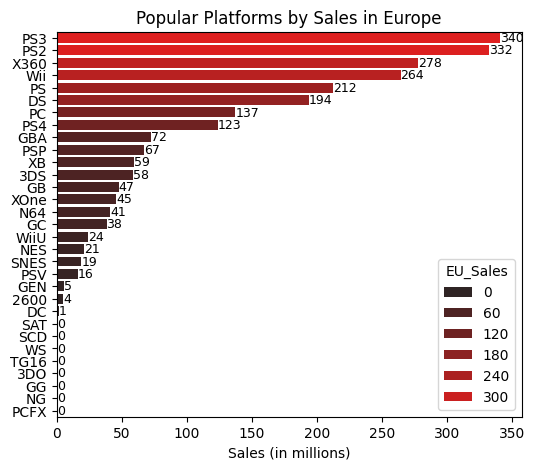

In [14]:
# group the games by platform and sort them by their sales in EU
EU_platform_sales = sales_df.groupby('Platform')['EU_Sales'].sum().reset_index()
EU_platform_sales = EU_platform_sales.sort_values(by='EU_Sales', ascending=False)

# set up palette
palette_EU = sns.dark_palette('red', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='EU_Sales', y='Platform', hue= 'EU_Sales', data=EU_platform_sales, palette=palette_EU)

# annotate values on each bar
for index, value in enumerate(EU_platform_sales['EU_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Platforms by Sales in Europe')
plt.show()

* The 'Playstation' series have been very popular in Europe with the PS3 and PS2 occupying the first 2 ranks (with 340 and 332 million respectively) and the PS1 being 5th behind the Wii at 212 million
* The XBox 360 (X360) occupies the 3rd place (with 278 millions), leaving a 53 million dollars gap after the PS2

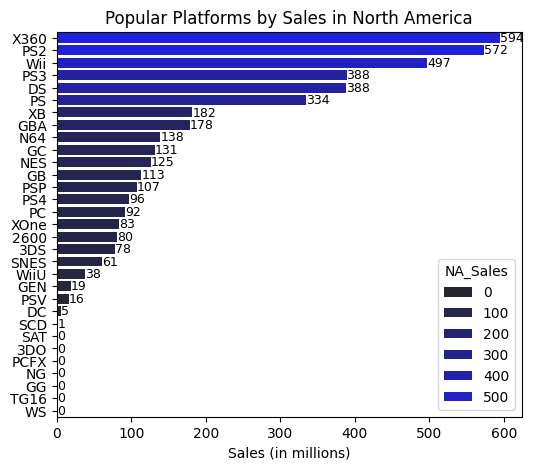

In [15]:
# group the games by platform and sort them by their sales in NA
NA_platform_sales = sales_df.groupby('Platform')['NA_Sales'].sum().reset_index()
NA_platform_sales = NA_platform_sales.sort_values(by='NA_Sales', ascending=False)

# set up palette
palette_NA = sns.dark_palette('blue', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='NA_Sales', y='Platform', hue= 'NA_Sales', data=NA_platform_sales, palette=palette_NA)

# annotate values on each bar
for index, value in enumerate(NA_platform_sales['NA_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Platforms by Sales in North America')
plt.show()

* While the X360 has performed much better in NA than in Europe and therefore coming at first place (594 million) in the region, the PS3 however drops to the 3rd place comparing to Europe (with 388 million)
* PS2 remains a constant second in both regions (572 million in NA), and PS coming not too far behind the PS3 (with 334 million) confirms the huge popularity of the PS series in the West
* The Wii also performed quite well in NA, coming at 3rd in the region (497 million)

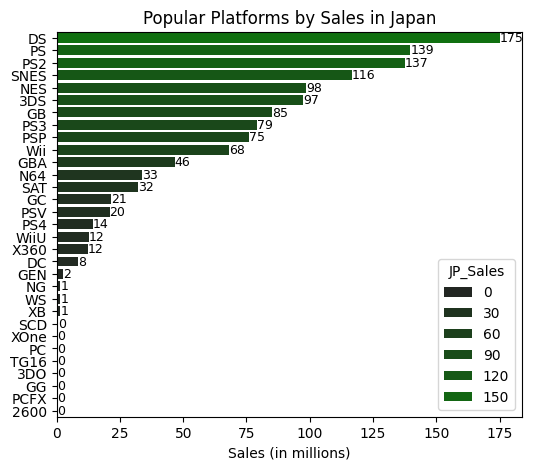

In [16]:
# group the games by platform and sort them by their sales in JP
JP_platform_sales = sales_df.groupby('Platform')['JP_Sales'].sum().reset_index()
JP_platform_sales = JP_platform_sales.sort_values(by='JP_Sales', ascending=False)

# set up palette
palette_JP = sns.dark_palette('green', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='JP_Sales', y='Platform', hue= 'JP_Sales', data=JP_platform_sales, palette=palette_JP)

# annotate values on each bar
for index, value in enumerate(JP_platform_sales['JP_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Platforms by Sales in Japan')
plt.show()

As expected, platforms' popularity in Japan is much different :

  * The Nintendo DS occupies 1st place by a great margin (175 million)
  * While the PS are close 2nd and 3rd (139M and 137M respectively), the more recent PS3 doesn't seem to have a great popularity with only 79 million worth of sales, dropping to a 8th place
  * The 1990's SNES and the even older 1983's NES show pretty surprising results with a 4th and 5th respective place (116M and 198M)

Unlike the other parts of the world, Japan seems to prefer (or at least show a great interest in) older platforms and consoles

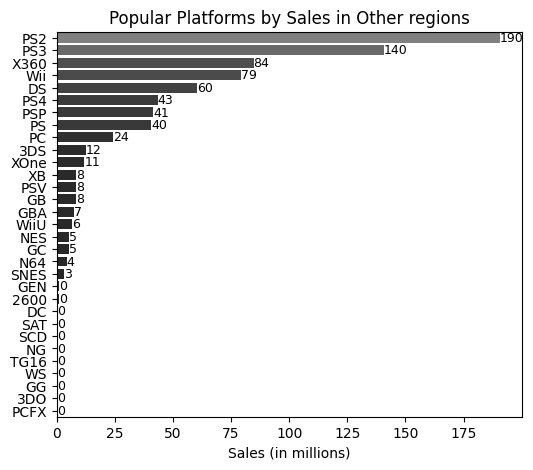

In [17]:
# group the games by platform and sort them by their sales in other regions
Other_platform_sales = sales_df.groupby('Platform')['Other_Sales'].sum().reset_index()
Other_platform_sales = Other_platform_sales.sort_values(by='Other_Sales', ascending=False)

# set up palette
palette_Other = sns.dark_palette('grey', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='Other_Sales', y='Platform', hue= 'Other_Sales', data=Other_platform_sales, palette=palette_Other, legend=False)

# annotate values on each bar
for index, value in enumerate(Other_platform_sales['Other_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Platforms by Sales in Other regions')
plt.show()

* In the other regions of the world, we have a constant popularity of the (at least recent) PS Series with the PS2 standing proudly at the 1st place (with 190 million) followed by its successor the PS3 with a not-so-shy 140 million to come up at 2nd place

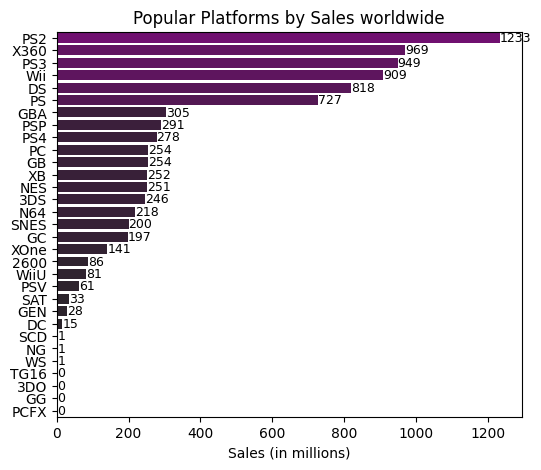

In [18]:
# group the games by platform and sort them by their sales worldwide
Global_platform_sales = sales_df.groupby('Platform')['Global_Sales'].sum().reset_index()
Global_platform_sales = Global_platform_sales.sort_values(by='Global_Sales', ascending=False)

# set up palette
palette_Global = sns.dark_palette('purple', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='Global_Sales', y='Platform', hue= 'Global_Sales', data=Global_platform_sales, palette=palette_Global, legend=False)

# annotate values on each bar
for index, value in enumerate(Global_platform_sales['Global_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Platforms by Sales worldwide')
plt.show()

* Overall and not so surprisingly, the PS2 is the most popular platform (1.23B), followed with a peloton composed by the X360 (969M), the PS3 (949M) and the Wii (909M)

* Japan is the only region where the customers don't really use the Wii. This starts to explain why although having remarkable sales globally, Wii Sports did not do that well in Japan
* All (EU, NA, Other) regions except Japan have the same top 4 platforms (although in different order). We can guess here cultural similarities in taste regarding video games and their platforms.

## III. Genre analysis

### 1. Popular Game Genres

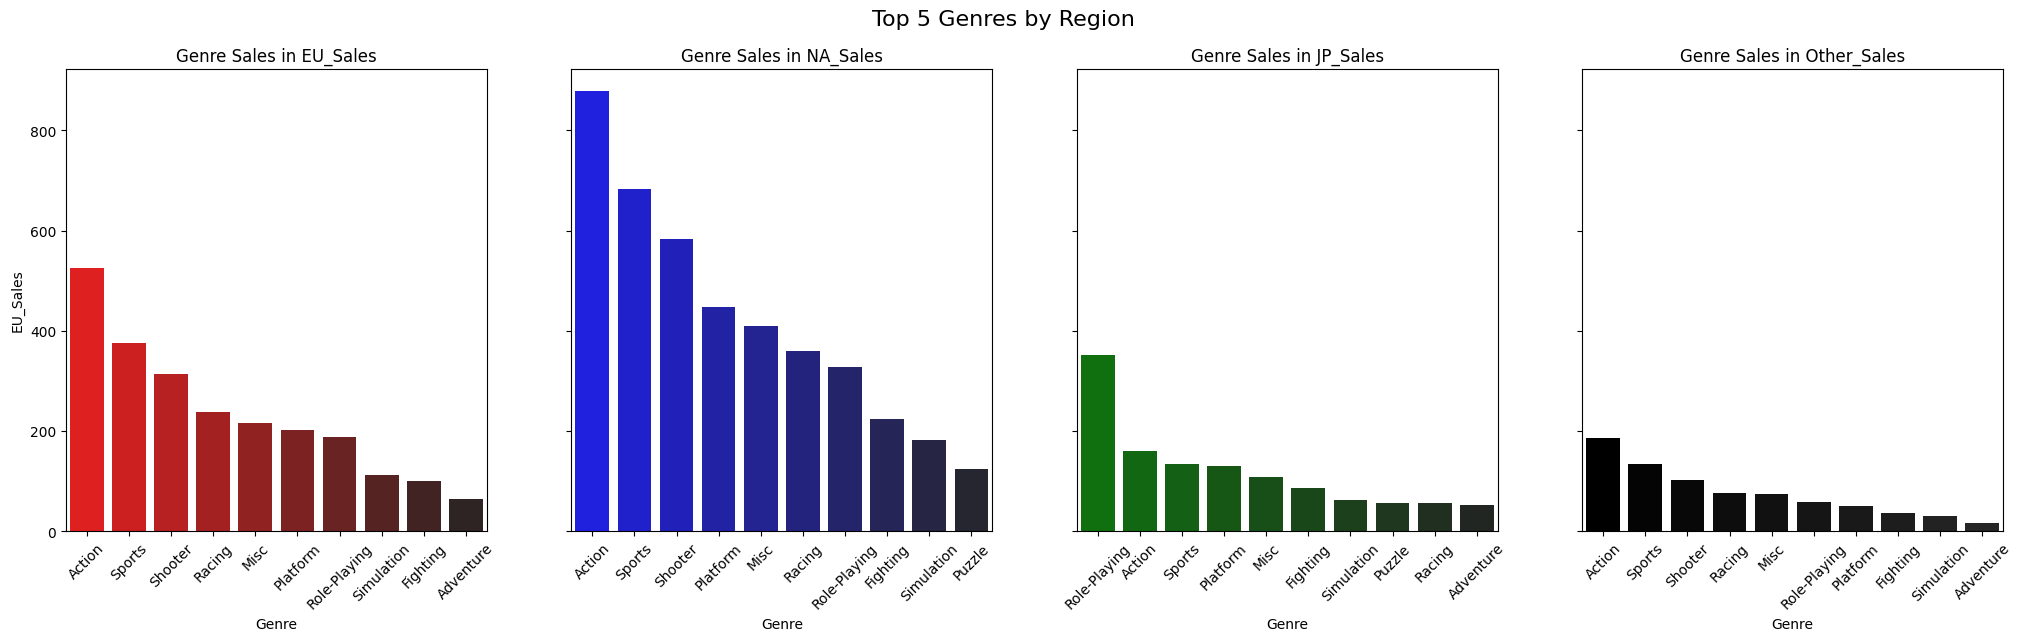

In [22]:
# create subplots for each region
fig, axes = plt.subplots(1, 4, figsize=(25, 6), sharey=True)
fig.suptitle('Top 5 Genres by Region', fontsize=16)

# define color palettes
region_palettes = {
    'EU_Sales': sns.dark_palette("red", 10, reverse=True),
    'NA_Sales': sns.dark_palette("blue", 10, reverse=True),
    'JP_Sales': sns.dark_palette("green", 10, reverse=True),
    'Other_Sales': sns.dark_palette("black", 10, reverse=True),
}
# iterate over each region
for i, (region, palette) in enumerate(region_palettes.items()):
    # Filter data for the specific region
    region_data = sales_df[['Genre', region]]
    
    # Get the top 10 genres for the region
    top_genres = region_data.groupby('Genre').sum().nlargest(10, region).reset_index()

    # Plot genre sales for the region
    ax = axes[i]
    sns.barplot(ax=ax, x='Genre', y=region, hue='Genre', data=top_genres, palette=palette)
    ax.set_title(f'Genre Sales in {region}')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.show()

* Wii Sports not selling so much in Japan is mostly due to the platform choice, since the 'Sports' genre occupies the 3rd spot in Japan
* Again, EU, NA and the other regions share a visible similarity in tastes. They have the exact same top 3 (Action, Sports, Shooter), and their top 10 is almost perfectly similar too
* 'Action' and 'Sports' genre are present everywhere in the world in the top 3 of each region. These seem to be very bankable and safe genres to publish
* Although it doesn't perform especially well in other places, the 'Role-Playing' genre is far ahead at 1st place in Japan. This is important to note if one wants to publish a game of such genre

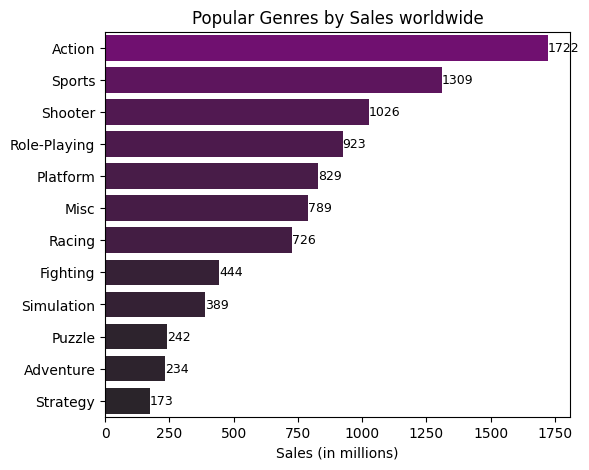

In [20]:
# group the games by platform and sort them by their sales worldwide
Global_genre_sales = sales_df.groupby('Genre')['Global_Sales'].sum().reset_index()
Global_genre_sales = Global_genre_sales.sort_values(by='Global_Sales', ascending=False)

# set up palette
palette_Global = sns.dark_palette('purple', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='Global_Sales', y='Genre', hue= 'Global_Sales', data=Global_genre_sales, palette=palette_Global, legend=False)

# annotate values on each bar
for index, value in enumerate(Global_genre_sales['Global_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Genres by Sales worldwide')
plt.show()

* Unsuprisingly, the 'Action' genre is the most popular worldwide (1.722 billion), followed by 'Sports' (1.309B) and 'Shooter' (1.026B)
* Regardless of geographical location, 'Action' and 'Sports' seem to be constantly bankable genres
* Similarly to the platforms' analysis, Japan shows many differences in the genres that sell compared to the rest of the world
    * 'Role-Playing' is by far the most popular genre there while being towards the end of the top 10 in the rest of the world
    * Despite being quite popular in the rest of the world, 'Shooter' games have the lowest sales in Japan
* Strategy games do not seem to perform well anywhere in the world

### 2. Evolution of Game Genres from 1980 to 2020

<Axes: title={'center': 'Number of New Games Released'}, ylabel='Number of Games'>

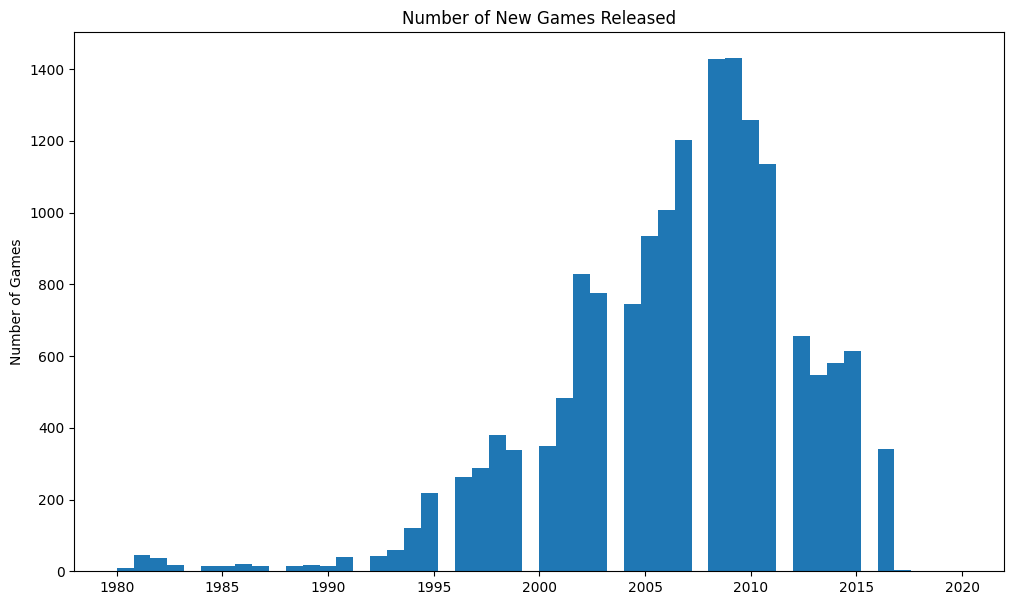

In [21]:
sales_df['Year'].plot(kind='hist',bins=50, figsize=(12,7),title='Number of New Games Released', ylabel= 'Number of Games')

* According to the dataset, there seems to have been a peak of game releases towards the end of the 2000's (esp. 2008) and the industry seems to be experiencing a decline since then
* We can notice two different periods based on the number of games released:
    * 1980 to 1995
    * 1996 to 2020

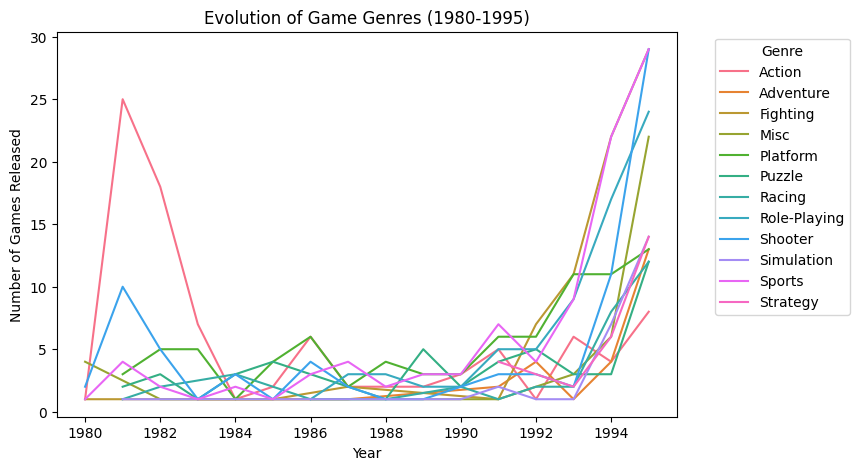

In [22]:
# Exclude games that were released on multiple platform and keep the first occurence of each game
filtered_df = sales_df.drop_duplicates(subset='Name', keep='first')
# Filter data for the years 1980 to 1995
filtered_df = sales_df[(sales_df['Year'].between(1980, 1995))]

# Group by Genre and Year, and count the number of games
genre_count_by_year = filtered_df.groupby(['Genre', 'Year']).size().reset_index(name='Number of Games Released')

# Plot the data
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Number of Games Released', hue='Genre', data=genre_count_by_year)
plt.title('Evolution of Game Genres (1980-1995)')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

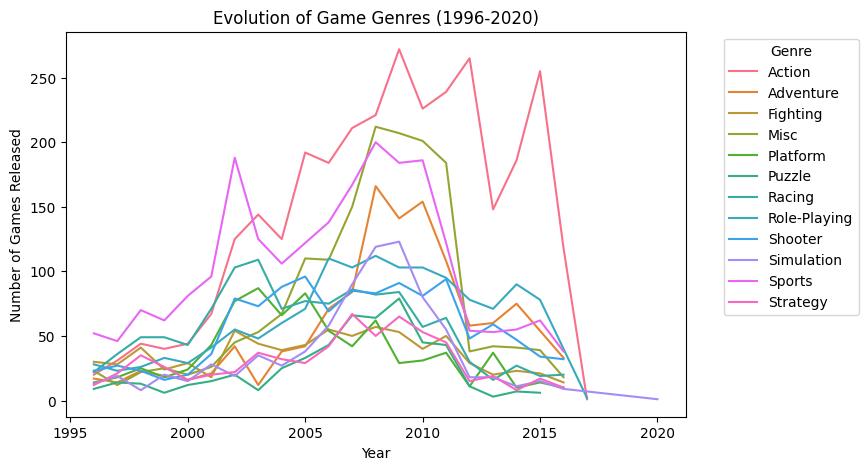

In [23]:
# Exclude games that were released on multiple platform and keep the first occurence of each game
filtered_df = sales_df.drop_duplicates(subset='Name', keep='first')
# Filter data for the years 1996 to 2020
filtered_df = sales_df[(sales_df['Year'].between(1996, 2020))]

# Group by Genre and Year, and count the number of games
genre_count_by_year = filtered_df.groupby(['Genre', 'Year']).size().reset_index(name='Number of Games Released')

# Plot the data
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Number of Games Released', hue='Genre', data=genre_count_by_year)
plt.title('Evolution of Game Genres (1996-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

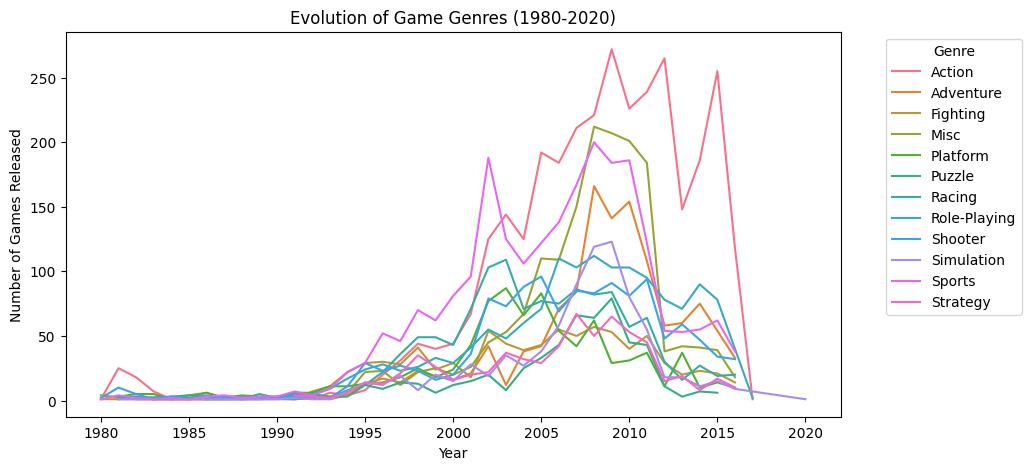

In [24]:
# Exclude games that were released on multiple platform and keep the first occurence of each game
filtered_df = sales_df.drop_duplicates(subset='Name', keep='first')
# Filter data for the years 1980 to 2020
filtered_df = sales_df[(sales_df['Year'].between(1980, 2020))]

# Group by Genre and Year, and count the number of games
genre_count_by_year = filtered_df.groupby(['Genre', 'Year']).size().reset_index(name='Number of Games Released')

# Plot the data
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Number of Games Released', hue='Genre', data=genre_count_by_year)
plt.title('Evolution of Game Genres (1980-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Here is how the most released game genre have evolved since 1985 :

   * 1980 to 1984 : Action
   * 1996 to 2002 : Sports
   * 2003 to 2020 : Action

## IV. Publishers' Analysis

### 1. Most Productive Publisher

In [6]:
# get the number of games preleased by the same publisher and filter only the top 3 publishers
prod_publisher = sales_df['Publisher'].value_counts().sort_values(ascending=False).reset_index()
prod_publisher.head(3)

,Publisher,count
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932


In [26]:
# get the genres of games released by EA
genre_EA = sales_df.loc[sales_df['Publisher'] == 'Electronic Arts', 'Genre'].value_counts().sort_values(ascending=False).reset_index()
genre_EA

,Genre,count
0,Sports,554
1,Action,182
2,Racing,159
3,Shooter,139
4,Simulation,116
5,Misc,43
6,Fighting,38
7,Strategy,37
8,Role-Playing,35
9,Platform,16


* The most productive publishers are EA, Activision and Namco Bandai
* EA has released over 1300 games with the majority of them being Sports games, followed by Action games (the most popular genres)

### 2. Best selling Publishers

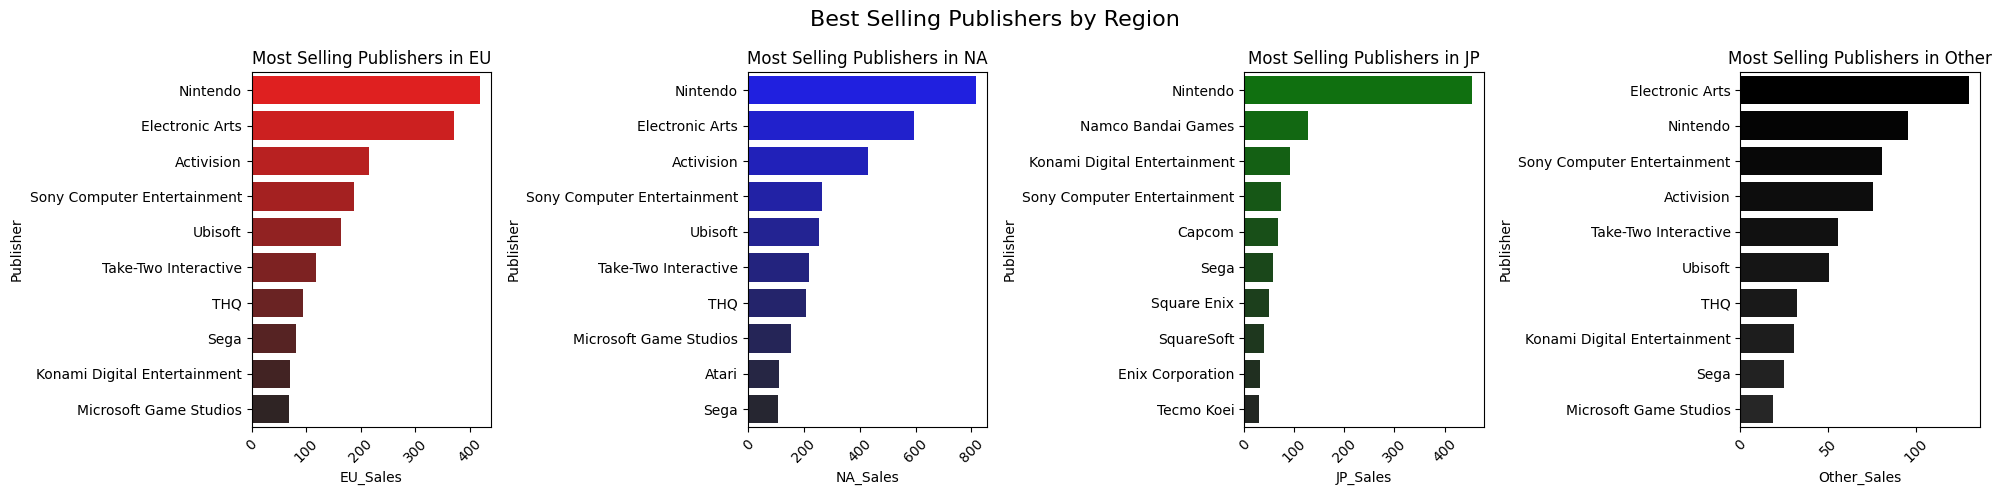

In [42]:
# create subplots for each region
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=False)
fig.suptitle('Best Selling Publishers by Region', fontsize=16)

# define color palettes
region_palettes = {
    'EU_Sales': sns.dark_palette("red", 10, reverse=True),
    'NA_Sales': sns.dark_palette("blue", 10, reverse=True),
    'JP_Sales': sns.dark_palette("green", 10, reverse=True),
    'Other_Sales': sns.dark_palette("black", 10, reverse=True),
}
# iterate over each region
for i, (region, palette) in enumerate(region_palettes.items()):
    # Filter data for the specific region
    region_data = sales_df[['Publisher', region]]
    
    # Get the top 10 genres for the region
    top_publisher = region_data.groupby('Publisher').sum().sort_values(by= region, ascending = False).head(10)

    # Plot publisher sales for the region
    ax = axes[i]
    sns.barplot(ax=ax, x=region, y='Publisher', hue='Publisher', data=top_publisher, palette=palette)
    ax.set_title(f'Most Selling Publishers in {region.split("_")[0]}')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

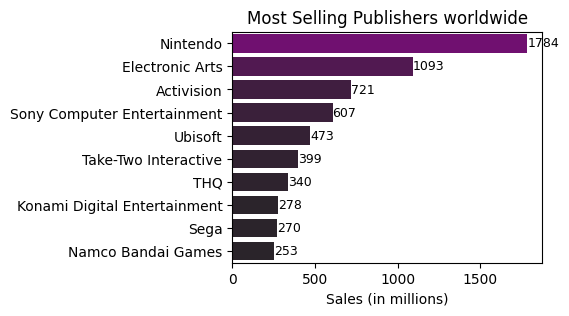

In [50]:
# group the games by publisher and sort them by their sales worldwide
top_publisher_global = sales_df.groupby('Publisher').sum().sort_values(by= 'Global_Sales', ascending = False).head(10)

# set up palette
palette_pub = sns.dark_palette('purple', as_cmap=True, reverse=False)

plt.figure(figsize=(4,3))
sns.barplot(x='Global_Sales', y='Publisher', hue= 'Global_Sales', data=top_publisher_global, palette=palette_pub, legend=False)

# annotate values on each bar
for index, value in enumerate(top_publisher_global['Global_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Most Selling Publishers worldwide')
plt.show()

* Nintendo is the top selling publishers globally (1.78 billion). It has the biggest market shares in Europe, North America and Japann, and comes right after Electronic Arts (EA) in the rest of the world. Compared to its competitors, Nintendo sells especially well in Japan with over twice the sales of Namco Bandai.
* EA (global sales just over a billion) sells particularly well in Europe and North America, second to Nintendo, but sales even better in other regions, selling more than any competitor there. On the contrary, it did not seem to find its place in Japan, not making it to the top 10 of the region.
* Activision (now owned by Microsoft) gets the 3rd place in the ranking of most selling publishers globally (721 million), with a 3rd place in Europe and North America, and a still decent 4th place in other region.  Similarly with its other American counterpart, it does not have any significant market share in Japan.
* Namco Bandai Games, while ranking 10th worldwide (253 million), gets a surprising 2nd place in Japan. It seems to have found its niche in this market that appears to go more for local companies (all top 10 is Japanese)

### 3. Nintendo - More numbers

   ###  *Most selling games*

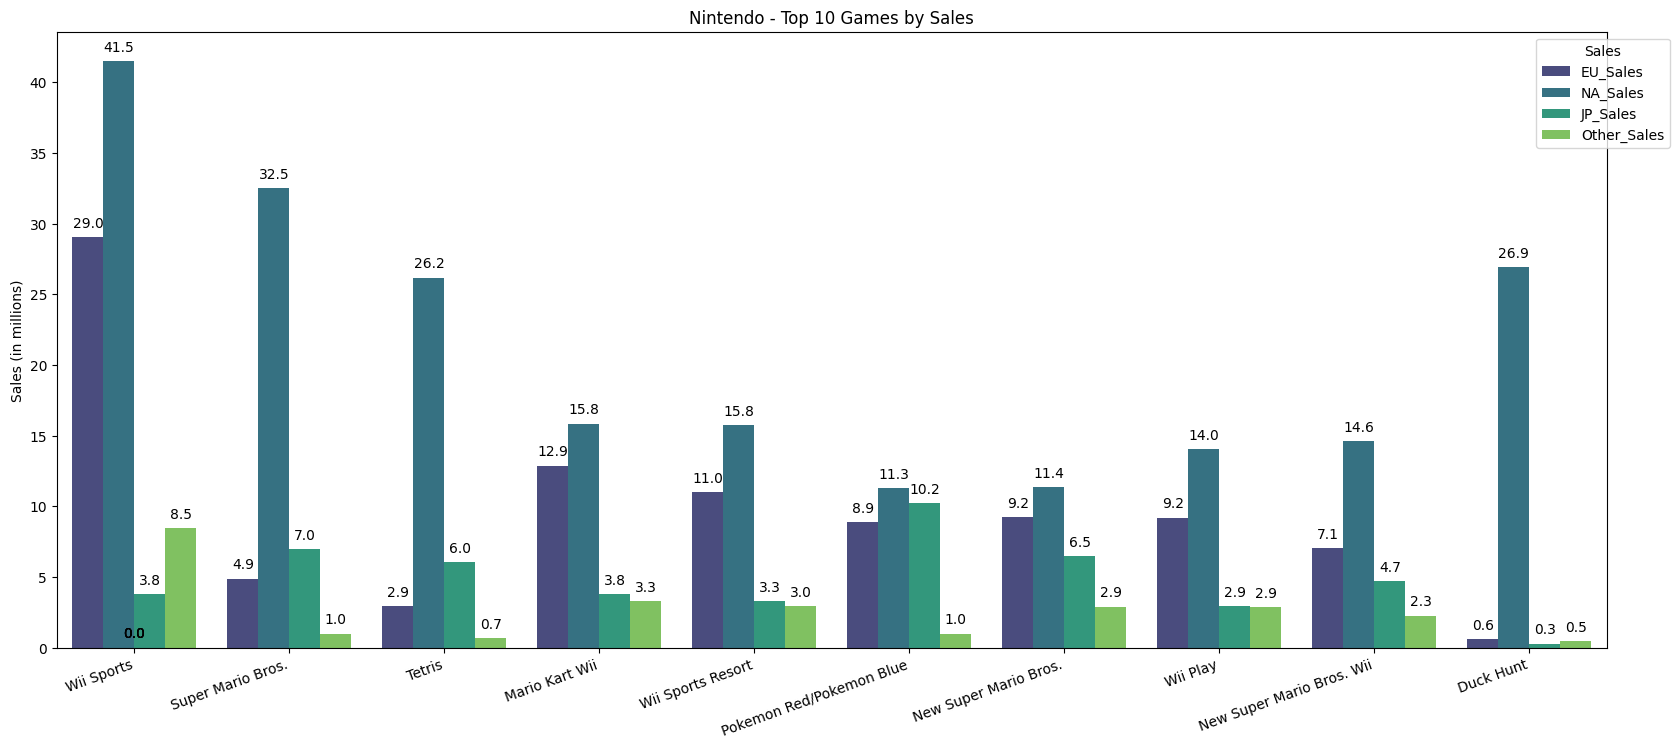

In [39]:
# filter data to get only Nintendo
ntd_games = sales_df[sales_df['Publisher'] == 'Nintendo']

# group and summarize sales by game
ntd_games = ntd_games.groupby('Name').agg({
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

# get top 10 most selling games
ntd_games = ntd_games.sort_values(by='Global_Sales', ascending= False).head(10)

# melt for plotting
ntd_games_melt = pd.melt(ntd_games, id_vars=['Name', 'Global_Sales'], var_name='Sales', value_name='Value')

# make barplot
plt.figure(figsize=(20, 8))
ax= sns.barplot(x='Name', y='Value', hue='Sales', data=ntd_games_melt, dodge=True, palette='viridis')
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('Sales (in millions)')
plt.title('Nintendo - Top 10 Games by Sales')
plt.legend(title='Sales', bbox_to_anchor=(0.95, 1), loc='upper left')

# add values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [40]:
# filter data to get only Nintendo
ntd_games = sales_df[sales_df['Publisher'] == 'Nintendo']

# group and summarize sales by game
ntd_games = ntd_games.groupby(['Name', 'Genre']).agg({
    'Year': 'first',
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum' 
}).reset_index()

# remove decimals for Year
ntd_games['Year'] = ntd_games['Year'].fillna(0).astype(int)

# get top 10 most selling games
ntd_games = ntd_games.sort_values(by='Global_Sales', ascending=False).head(10)

ntd_games

,Name,Genre,Year,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
643,Wii Sports,Sports,2006,29.02,41.49,3.77,8.46,82.74
534,Super Mario Bros.,Platform,1985,4.88,32.48,6.96,0.99,45.31
577,Tetris,Puzzle,1989,2.95,26.17,6.03,0.69,35.84
306,Mario Kart Wii,Racing,2008,12.88,15.85,3.79,3.31,35.82
645,Wii Sports Resort,Sports,2009,11.01,15.75,3.28,2.96,33.00
450,Pokemon Red/Pokemon Blue,Role-Playing,1996,8.89,11.27,10.22,1.00,31.37
384,New Super Mario Bros.,Platform,2006,9.23,11.38,6.50,2.90,30.01
641,Wii Play,Misc,2006,9.20,14.03,2.93,2.85,29.02
387,New Super Mario Bros. Wii,Platform,2009,7.06,14.59,4.70,2.26,28.62
121,Duck Hunt,Shooter,1984,0.63,26.93,0.28,0.47,28.31


### *Most selling genres*

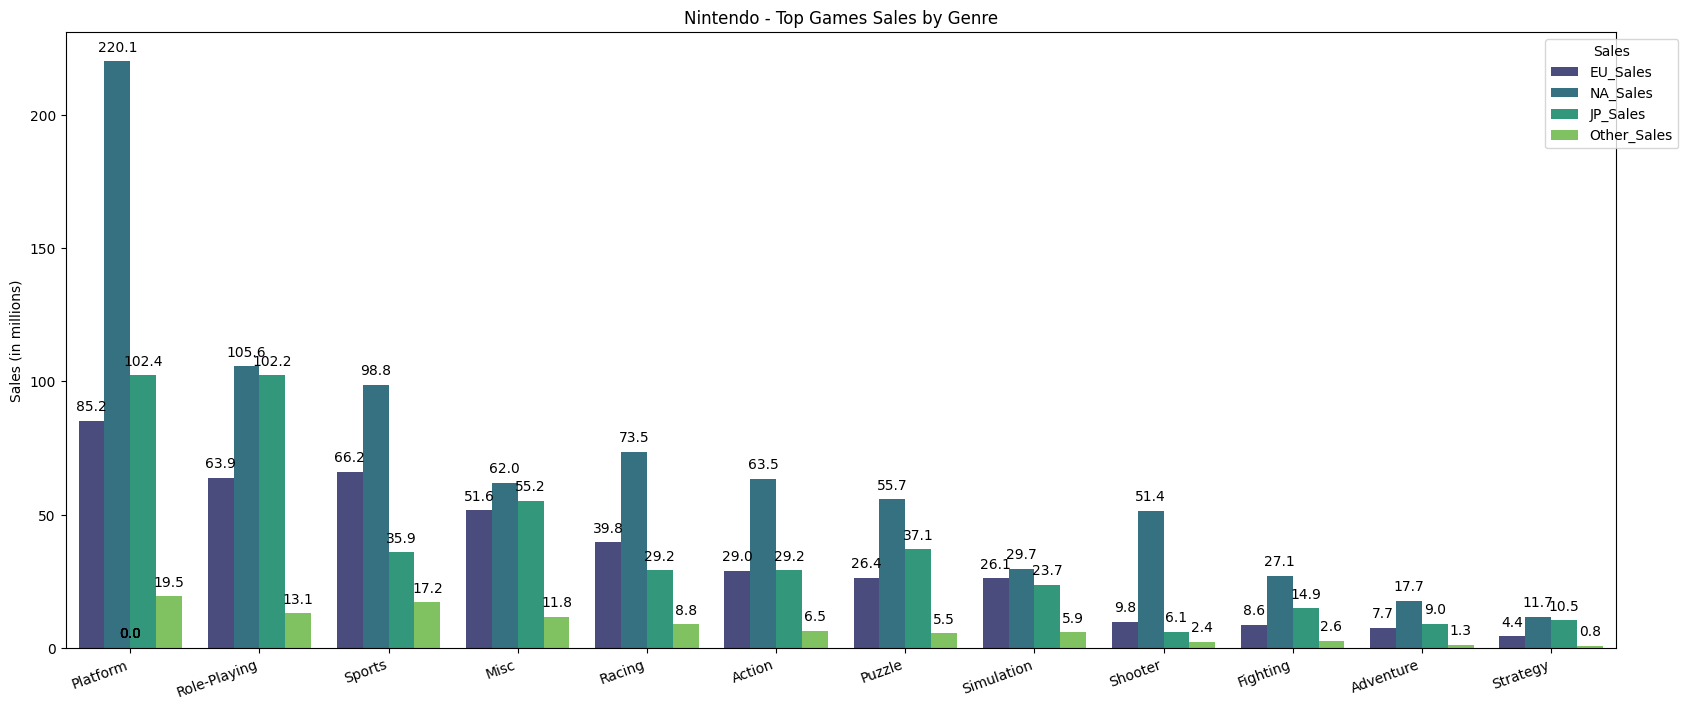

In [40]:
# filter data to get only Nintendo
ntd_genre = sales_df[sales_df['Publisher'] == 'Nintendo']

# group and summarize sales by game
ntd_genre = ntd_genre.groupby('Genre').agg({
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

# get top most selling genres
ntd_genre = ntd_genre.sort_values(by='Global_Sales', ascending= False)

# melt for plotting
ntd_genre_melt = pd.melt(ntd_genre, id_vars=['Genre', 'Global_Sales'], var_name='Sales', value_name='Value')

# make barplot
plt.figure(figsize=(20, 8))
ax= sns.barplot(x='Genre', y='Value', hue='Sales', data=ntd_genre_melt, dodge=True, palette="viridis")
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('Sales (in millions)')
plt.title('Nintendo - Top Games Sales by Genre')
plt.legend(title='Sales', bbox_to_anchor=(0.95, 1), loc='upper left')


# add values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

In [63]:
# filter data to get only Nintendo
ntd_genre = sales_df[sales_df['Publisher'] == 'Nintendo']

# group and summarize sales by game
ntd_genre = ntd_genre.groupby(['Genre']).agg({
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum',
    'Name': 'count' 
}).reset_index()

# Rename the 'Name' column for better understandability
ntd_genre = ntd_genre.rename(columns={'Name': 'Games'})

# get top most selling genres
ntd_genre = ntd_genre.sort_values(by='Global_Sales', ascending=False)

# reset the index
ntd_genre = ntd_genre.set_index(pd.Index(range(len(ntd_genre))))

ntd_genre

,Genre,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales,Games
0,Platform,85.21,220.14,102.36,19.47,427.21,112
1,Role-Playing,63.92,105.63,102.24,13.07,284.90,106
2,Sports,66.18,98.77,35.87,17.18,218.01,55
3,Misc,51.62,61.98,55.25,11.78,180.67,100
4,Racing,39.75,73.55,29.22,8.81,151.30,37
5,Action,29.02,63.49,29.24,6.48,128.18,79
6,Puzzle,26.42,55.74,37.09,5.53,124.88,74
7,Simulation,26.05,29.70,23.67,5.86,85.27,29
8,Shooter,9.85,51.39,6.07,2.39,69.73,26
9,Fighting,8.64,27.10,14.94,2.65,53.35,18


*Interpretation:*

* North America is Nintendo's predominant market for any genre
* Nintendo's top selling games have all been released before 2010
* Wii Sports, Super Mario Bros. and Tetris are the best selling games for Nintendo. Duck Hunt sold almost exclusively in NA
* Platform games (427.2 million), Role-Playing games (284.9 million) and Sports games (218.1 million) are Nintendo's top selling genres. Strategy games do not sell much (27.4 million)
* As we saw in the Genre analysis, Nintendo's Action games and Shooter games did not sell much in Japan despite being quite popular in the rest of the world
* While Role-Playing games sell much more in Japan than in Europe (102.2M and 63.9M respecitively), it is the opposite for Sports Games (66.2M in Europe, 35.9M in Japan)

### *Number of Games released*

### a. By Genre

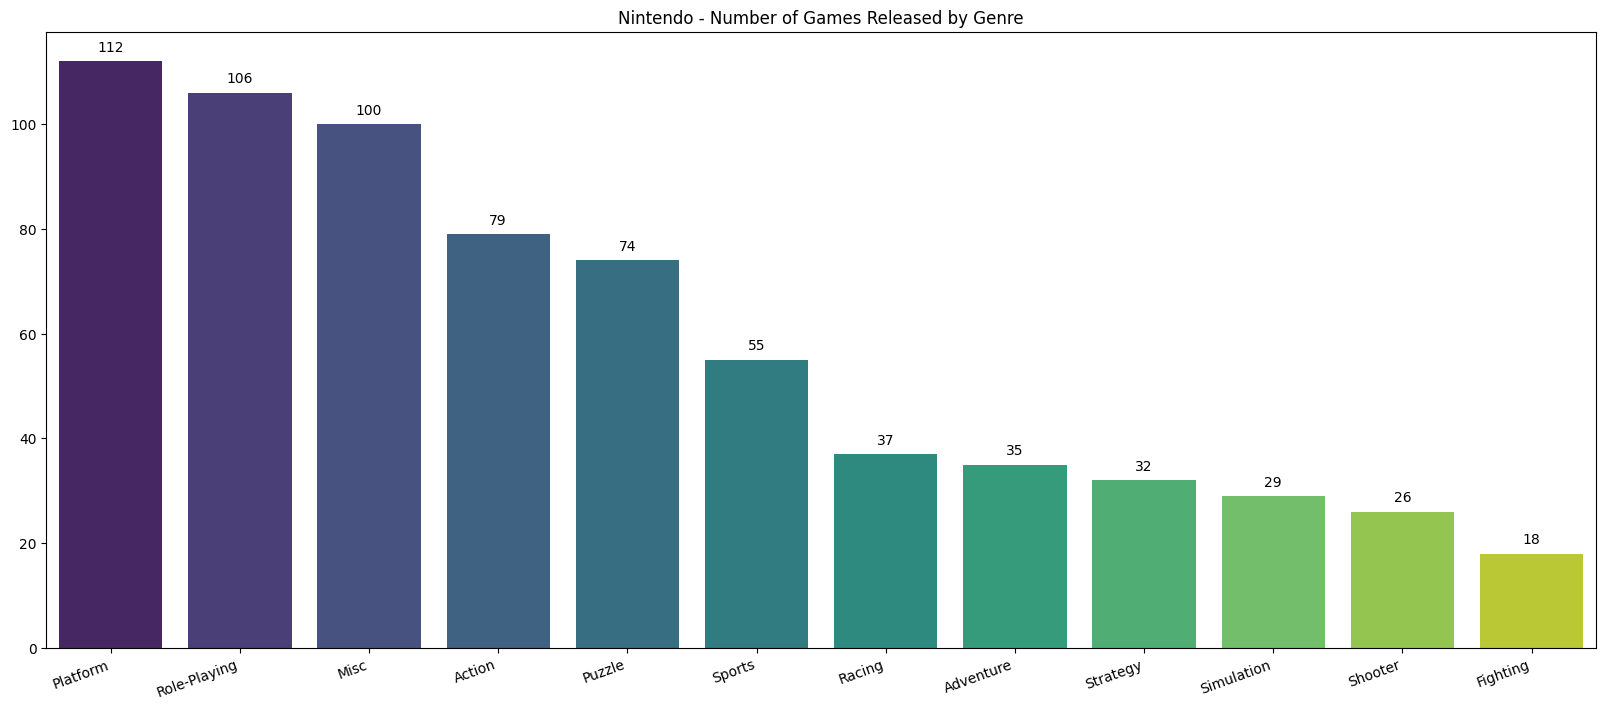

In [43]:
# filter data to get only Nintendo
ntd_rel_genre = sales_df[sales_df['Publisher'] == 'Nintendo']

# count the number of games per genre
ntd_rel_genre = ntd_rel_genre['Genre'].value_counts().reset_index()
ntd_rel_genre.columns = ['Genre', 'Name']

# rename the 'Name' column for better understandability
ntd_rel_genre = ntd_rel_genre.rename(columns={'Name': 'Games'})

# sort by the total number of games in descending order
ntd_rel_genre = ntd_rel_genre.sort_values(by='Games', ascending=False)

# make barplot
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Genre', y='Games', hue= 'Genre', data=ntd_rel_genre, palette="viridis")
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.title('Nintendo - Number of Games Released by Genre')

# add values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

### b. By Platform

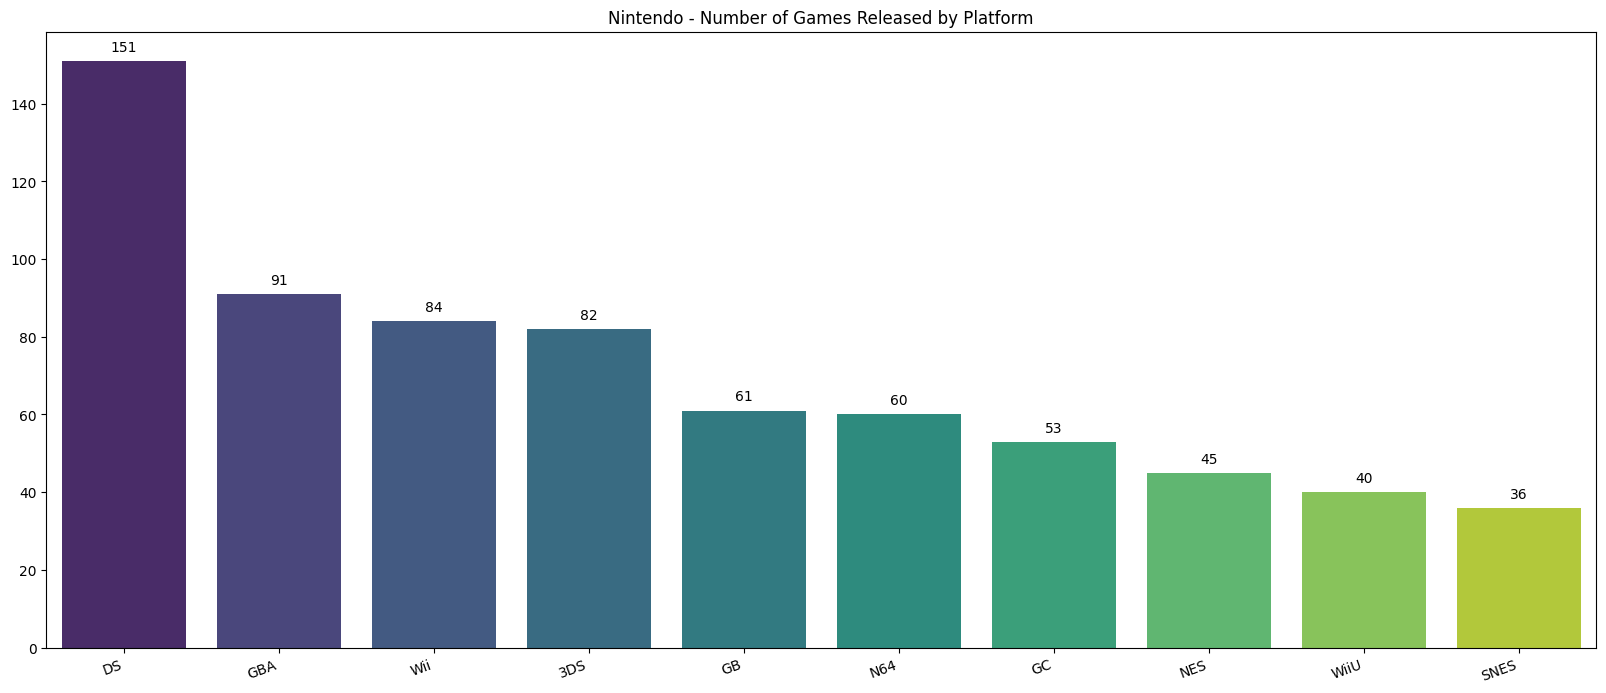

In [44]:
# filter data to get only Nintendo
ntd_rel_plat = sales_df[sales_df['Publisher'] == 'Nintendo']

# count the number of games per genre
ntd_rel_plat = ntd_rel_plat['Platform'].value_counts().reset_index()
ntd_rel_plat.columns = ['Platform', 'Name']

# rename the 'Name' column for better understandability
ntd_rel_plat = ntd_rel_plat.rename(columns={'Name': 'Games'})

# sort by the total number of games in descending order
ntd_rel_plat = ntd_rel_plat.sort_values(by='Games', ascending=False)

# make barplot
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Platform', y='Games', hue= 'Platform', data=ntd_rel_plat, palette="viridis")
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.title('Nintendo - Number of Games Released by Platform')

# add values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

### 4. Electronic Arts - More Numbers

### *Most selling games*

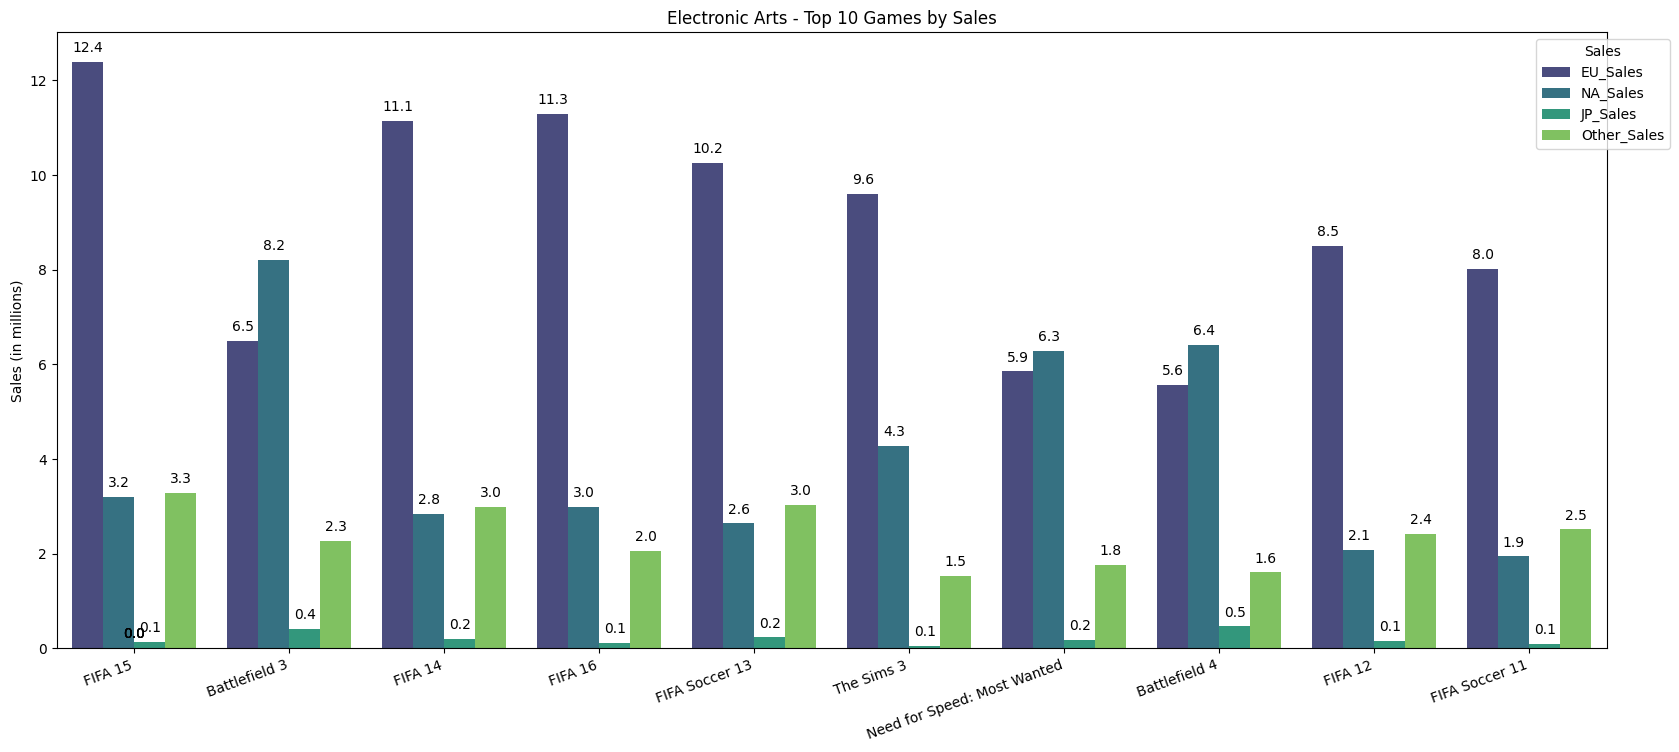

In [46]:
# filter data to get only EA
EA_games = sales_df[sales_df['Publisher'] == 'Electronic Arts']

# group and summarize sales by game
EA_games = EA_games.groupby('Name').agg({
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

# get top 10 most selling games
EA_games = EA_games.sort_values(by='Global_Sales', ascending= False).head(10)

# melt for plotting
EA_games_melt = pd.melt(EA_games, id_vars=['Name', 'Global_Sales'], var_name='Sales', value_name='Value')

# make barplot
plt.figure(figsize=(20, 8))
ax= sns.barplot(x='Name', y='Value', hue='Sales', data=EA_games_melt, dodge=True, palette='viridis')
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('Sales (in millions)')
plt.title('Electronic Arts - Top 10 Games by Sales')
plt.legend(title='Sales', bbox_to_anchor=(0.95, 1), loc='upper left')

# add values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [75]:
# filter data to get only EA
EA_games = sales_df[sales_df['Publisher'] == 'Electronic Arts']

# group and summarize sales by game
EA_games = EA_games.groupby(['Name', 'Genre']).agg({
    'Year': 'first',
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum' 
}).reset_index()

# remove decimals for Year
EA_games['Year'] = EA_games['Year'].fillna(0).astype(int)

# get top 10 most selling games
EA_games = EA_games.sort_values(by='Global_Sales', ascending=False).head(10)

EA_games

,Name,Genre,Year,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
125,FIFA 15,Sports,2014,12.40,3.20,0.13,3.29,19.02
24,Battlefield 3,Shooter,2011,6.49,8.20,0.41,2.27,17.36
124,FIFA 14,Sports,2013,11.14,2.84,0.20,2.98,17.14
126,FIFA 16,Sports,2015,11.29,2.98,0.11,2.05,16.44
141,FIFA Soccer 13,Action,2012,10.25,2.64,0.23,3.03,16.16
530,The Sims 3,Simulation,2009,9.60,4.28,0.05,1.53,15.45
408,Need for Speed: Most Wanted,Racing,2005,5.85,6.29,0.18,1.76,14.08
25,Battlefield 4,Shooter,2013,5.57,6.41,0.46,1.60,14.03
123,FIFA 12,Sports,2011,8.50,2.08,0.15,2.41,13.15
140,FIFA Soccer 11,Sports,2010,8.01,1.94,0.09,2.51,12.56


### *Most selling genres*

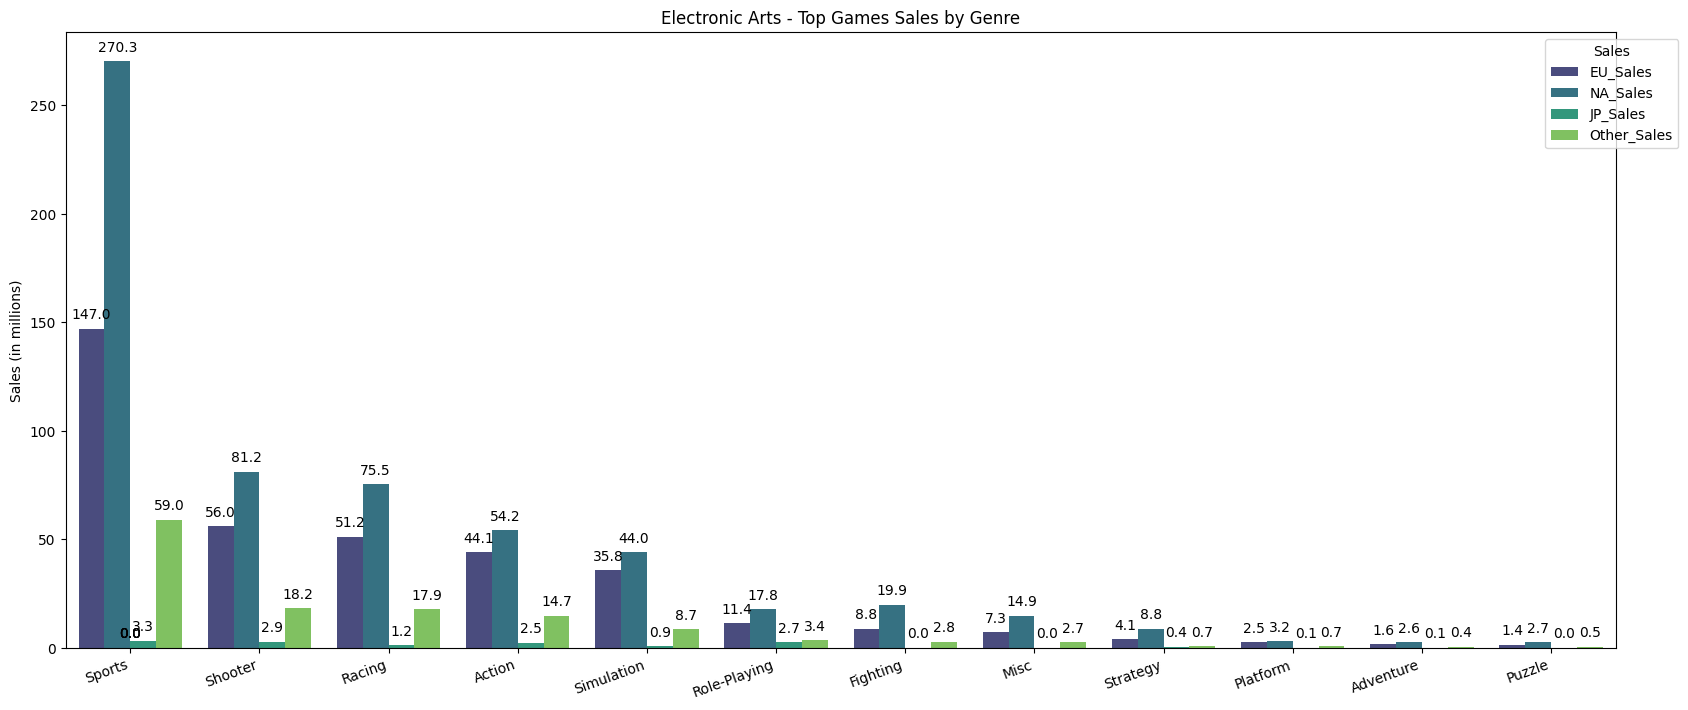

In [47]:
# filter data to get only EA
EA_genre = sales_df[sales_df['Publisher'] == 'Electronic Arts']

# group and summarize sales by game
EA_genre = EA_genre.groupby('Genre').agg({
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

# get top most selling genres
EA_genre = EA_genre.sort_values(by='Global_Sales', ascending= False)

# melt for plotting
EA_genre_melt = pd.melt(EA_genre, id_vars=['Genre', 'Global_Sales'], var_name='Sales', value_name='Value')

# make barplot
plt.figure(figsize=(20, 8))
ax= sns.barplot(x='Genre', y='Value', hue='Sales', data=EA_genre_melt, dodge=True, palette="viridis")
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('Sales (in millions)')
plt.title('Electronic Arts - Top Games Sales by Genre')
plt.legend(title='Sales', bbox_to_anchor=(0.95, 1), loc='upper left')


# add values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

In [77]:
# filter data to get only EA
EA_genre = sales_df[sales_df['Publisher'] == 'Electronic Arts']

# group and summarize sales by game
EA_genre = EA_genre.groupby(['Genre']).agg({
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum',
    'Name': 'count' 
}).reset_index()

# Rename the 'Name' column for better understandability
EA_genre = EA_genre.rename(columns={'Name': 'Games'})

# get top most selling genres
EA_genre = EA_genre.sort_values(by='Global_Sales', ascending=False)

# reset the index
EA_genre = EA_genre.set_index(pd.Index(range(len(EA_genre))))

EA_genre

,Genre,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales,Games
0,Sports,146.97,270.27,3.27,59.01,479.67,561
1,Shooter,56.03,81.15,2.93,18.20,158.26,139
2,Racing,51.20,75.52,1.20,17.90,145.77,159
3,Action,44.07,54.25,2.49,14.73,115.54,183
4,Simulation,35.83,44.03,0.88,8.72,89.53,116
5,Role-Playing,11.39,17.82,2.66,3.42,35.30,35
6,Fighting,8.75,19.88,0.03,2.78,31.39,39
7,Misc,7.30,14.92,0.01,2.70,24.95,46
8,Strategy,4.10,8.84,0.44,0.67,14.08,37
9,Platform,2.55,3.16,0.05,0.74,6.53,16


*Interpretation:*

* EA has significant market shares in Europe and NA. However, it shows poor results in Japan across all genres
* EA's top selling games have been released between 2005 and 2015. They seem to focus more on novelty than Nintendo
* FIFA series (especially 15, 14, 16, 13) and Battlefield 3 are the best selling games for EA. Most items in EA's top selling games are FIFA games
* Therefore, EA's top selling genre is Sports games. The company is the leading publisher of sports games worldwide (479.7M)
* Other great selling genres for EA are Shooter games (158.2M) and  Racing games (145.8M)
* Compared to Nintendo, EA focuses on a few sample of genres (Sports, Shooter, Racing, Action, Simulation). Other genres don't sell much

### *Number of Games released:*

### a. By Genre

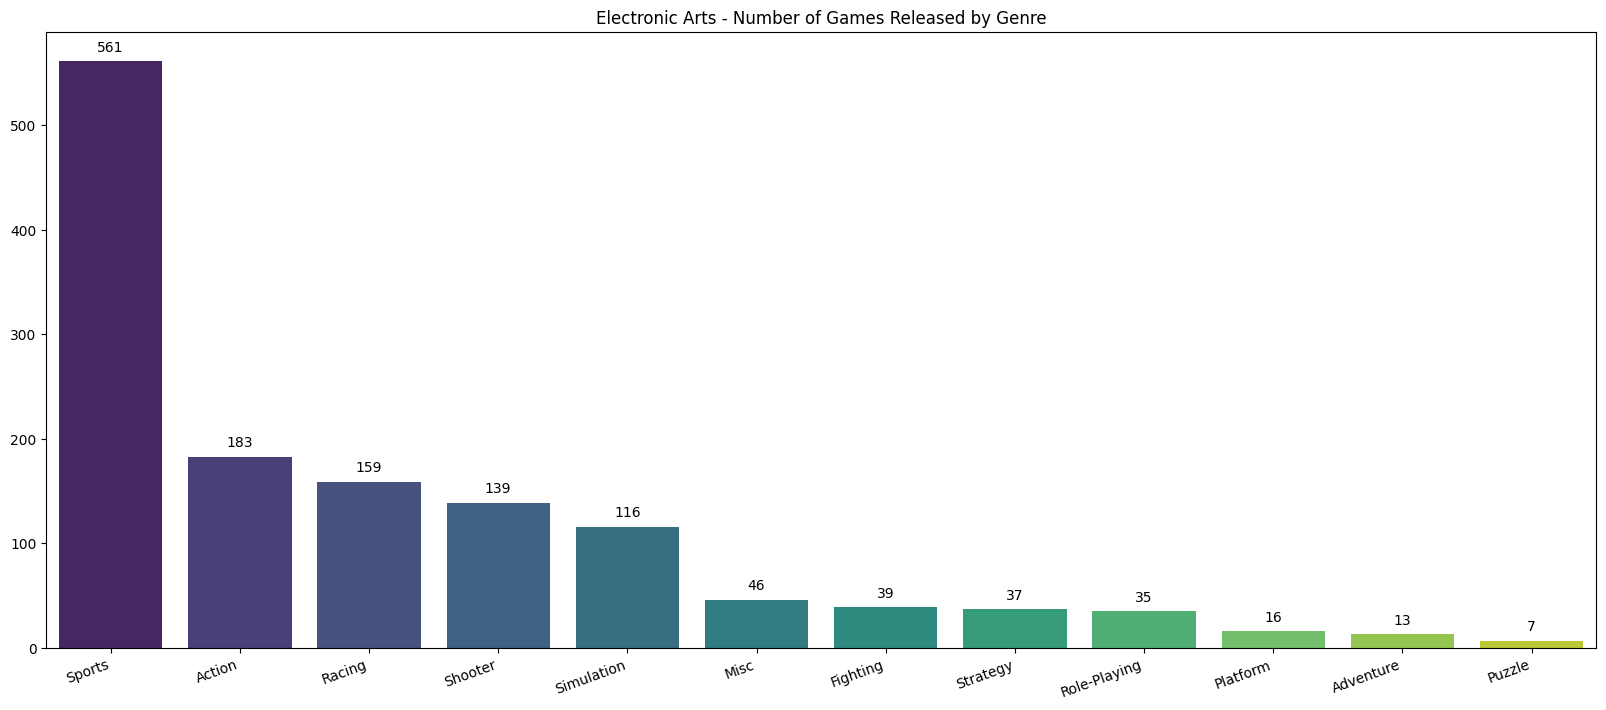

In [48]:
# filter data to get only EA
EA_rel_genre = sales_df[sales_df['Publisher'] == 'Electronic Arts']

# count the number of games per genre
EA_rel_genre = EA_rel_genre['Genre'].value_counts().reset_index()
EA_rel_genre.columns = ['Genre', 'Name']

# rename the 'Name' column for better understandability
EA_rel_genre = EA_rel_genre.rename(columns={'Name': 'Games'})

# sort by the total number of games in descending order
EA_rel_genre = EA_rel_genre.sort_values(by='Games', ascending=False)

# make barplot
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Genre', y='Games', hue= 'Genre', data=EA_rel_genre, palette="viridis")
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.title('Electronic Arts - Number of Games Released by Genre')

# add values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

### b. By Platform

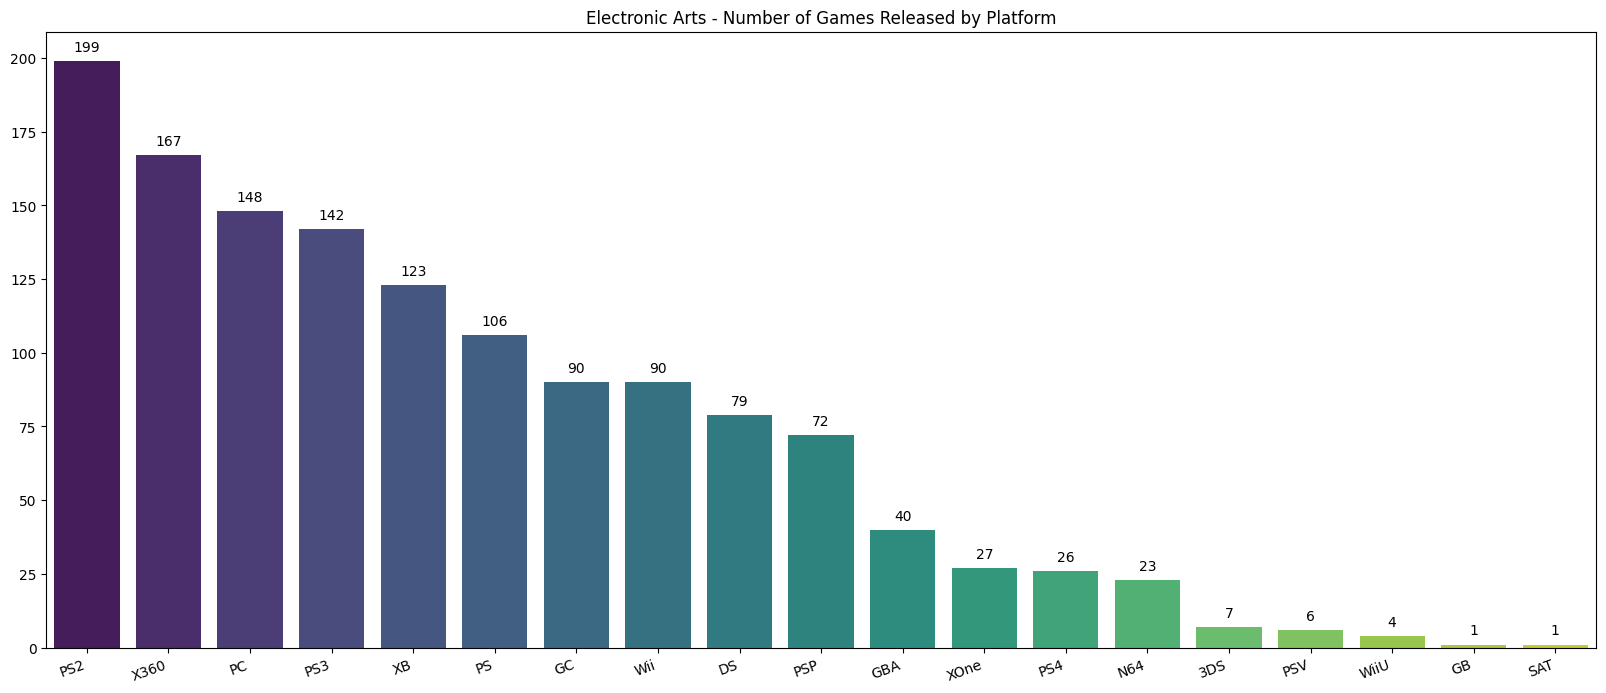

In [49]:
# filter data to get only EA
EA_rel_plat = sales_df[sales_df['Publisher'] == 'Electronic Arts']

# count the number of games per genre
EA_rel_plat = EA_rel_plat['Platform'].value_counts().reset_index()
EA_rel_plat.columns = ['Platform', 'Name']

# rename the 'Name' column for better understandability
EA_rel_plat = EA_rel_plat.rename(columns={'Name': 'Games'})

# sort by the total number of games in descending order
EA_rel_plat = EA_rel_plat.sort_values(by='Games', ascending=False)

# make barplot
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Platform', y='Games', hue= 'Platform', data=EA_rel_plat, palette="viridis")
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.title('Electronic Arts - Number of Games Released by Platform')

# add values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

### 5. Activision - More numbers

### *Most selling games*

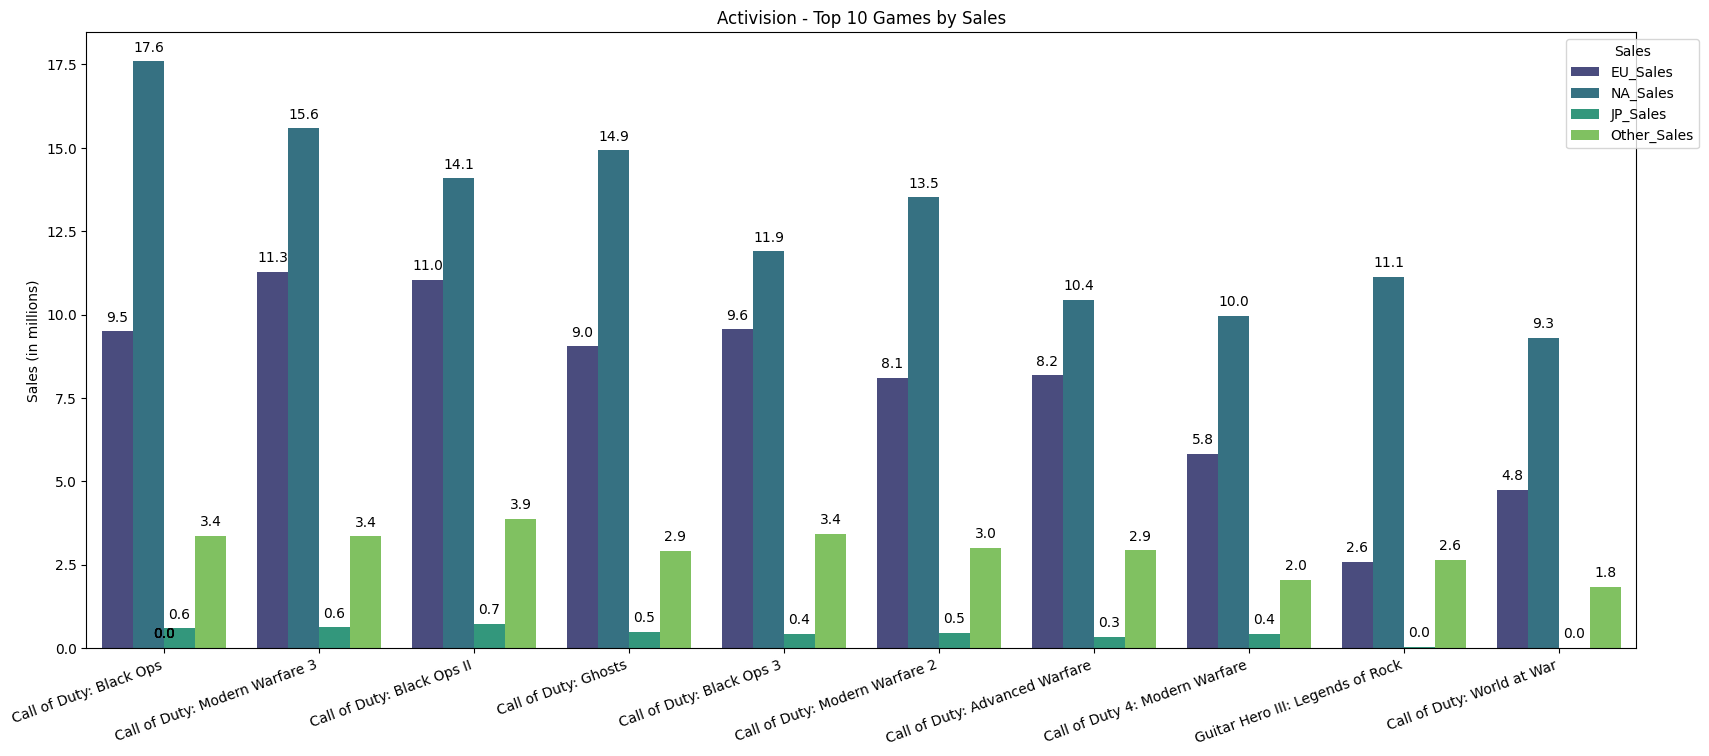

In [50]:
# filter data to get only Activision
act_games = sales_df[sales_df['Publisher'] == 'Activision']

# group and summarize sales by game
act_games = act_games.groupby('Name').agg({
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

# get top 10 most selling games
act_games = act_games.sort_values(by='Global_Sales', ascending= False).head(10)

# melt for plotting
act_games_melt = pd.melt(act_games, id_vars=['Name', 'Global_Sales'], var_name='Sales', value_name='Value')

# make barplot
plt.figure(figsize=(20, 8))
ax= sns.barplot(x='Name', y='Value', hue='Sales', data=act_games_melt, dodge=True, palette='viridis')
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('Sales (in millions)')
plt.title('Activision - Top 10 Games by Sales')
plt.legend(title='Sales', bbox_to_anchor=(0.95, 1), loc='upper left')

# add values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [81]:
# filter data to get only Activison
act_games = sales_df[sales_df['Publisher'] == 'Activision']

# group and summarize sales by game
act_games = act_games.groupby(['Name', 'Genre']).agg({
    'Year': 'first',
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum' 
}).reset_index()

# remove decimals for Year
act_games['Year'] = act_games['Year'].fillna(0).astype(int)

# get top 10 most selling games
act_games = act_games.sort_values(by='Global_Sales', ascending=False).head(10)

act_games

,Name,Genre,Year,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
70,Call of Duty: Black Ops,Shooter,2010,9.50,17.59,0.59,3.36,31.03
76,Call of Duty: Modern Warfare 3,Shooter,2011,11.29,15.58,0.62,3.35,30.83
72,Call of Duty: Black Ops II,Shooter,2012,11.05,14.08,0.72,3.88,29.72
74,Call of Duty: Ghosts,Shooter,2013,9.05,14.92,0.48,2.92,27.38
71,Call of Duty: Black Ops 3,Shooter,2015,9.56,11.89,0.43,3.42,25.32
75,Call of Duty: Modern Warfare 2,Shooter,2009,8.11,13.52,0.46,3.01,25.09
69,Call of Duty: Advanced Warfare,Shooter,2014,8.18,10.44,0.34,2.93,21.90
67,Call of Duty 4: Modern Warfare,Shooter,2007,5.82,9.97,0.42,2.05,18.25
135,Guitar Hero III: Legends of Rock,Misc,2007,2.59,11.14,0.04,2.64,16.39
83,Call of Duty: World at War,Shooter,2008,4.75,9.30,0.00,1.83,15.87


### *Most selling genres*

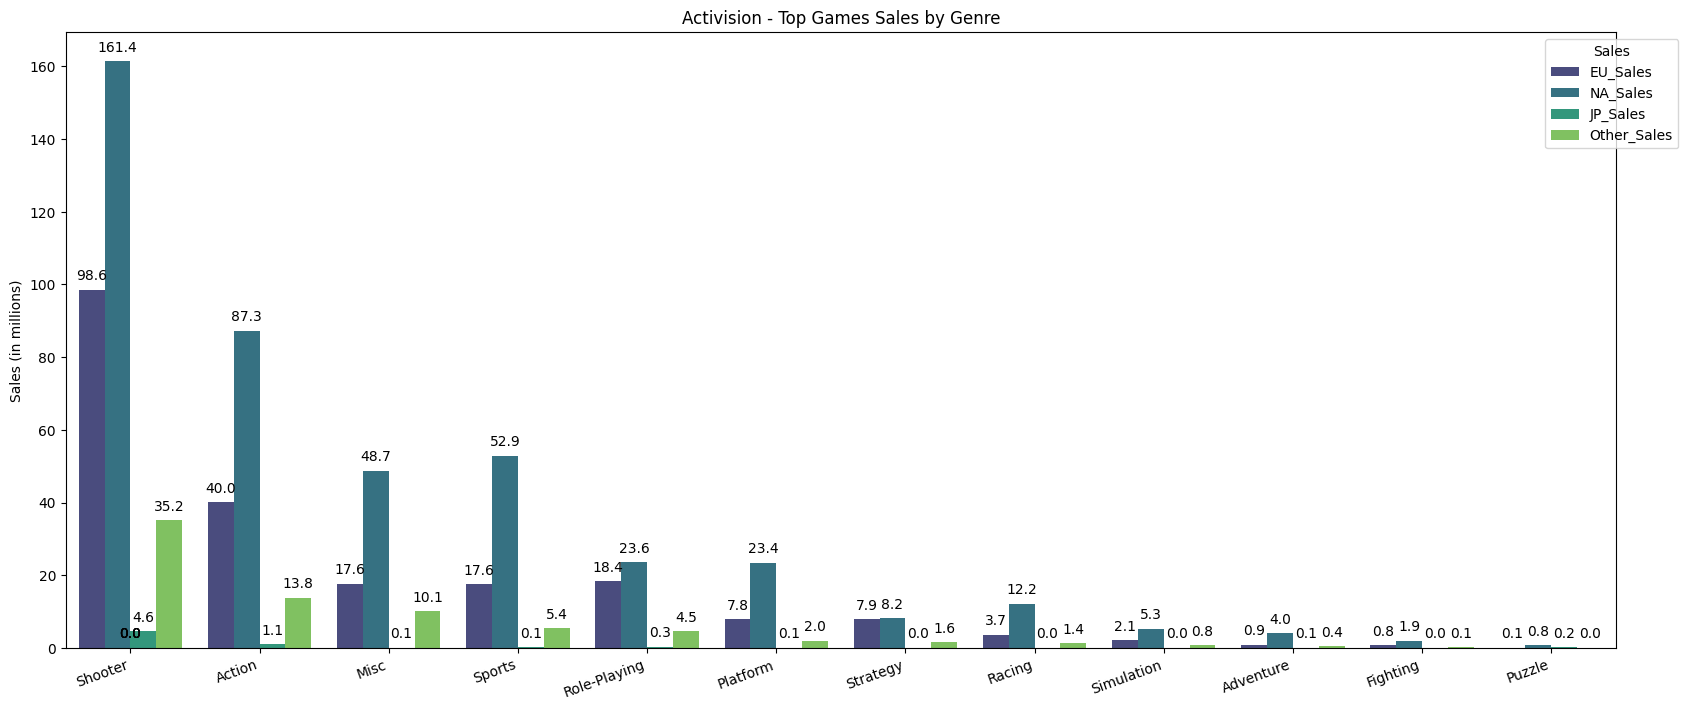

In [51]:
# filter data to get only Activison
act_genre = sales_df[sales_df['Publisher'] == 'Activision']

# group and summarize sales by game
act_genre = act_genre.groupby('Genre').agg({
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

# get top most selling genres
act_genre = act_genre.sort_values(by='Global_Sales', ascending= False)

# melt for plotting
act_genre_melt = pd.melt(act_genre, id_vars=['Genre', 'Global_Sales'], var_name='Sales', value_name='Value')

# make barplot
plt.figure(figsize=(20, 8))
ax= sns.barplot(x='Genre', y='Value', hue='Sales', data=act_genre_melt, dodge=True, palette="viridis")
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('Sales (in millions)')
plt.title('Activision - Top Games Sales by Genre')
plt.legend(title='Sales', bbox_to_anchor=(0.95, 1), loc='upper left')


# add values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

In [83]:
# filter data to get only Activision
act_genre = sales_df[sales_df['Publisher'] == 'Activision']

# group and summarize sales by game
act_genre = act_genre.groupby(['Genre']).agg({
    'EU_Sales': 'sum',
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum',
    'Name': 'count' 
}).reset_index()

# Rename the 'Name' column for better understandability
act_genre = act_genre.rename(columns={'Name': 'Games'})

# get top most selling genres
act_genre = act_genre.sort_values(by='Global_Sales', ascending=False)

# reset the index
act_genre = act_genre.set_index(pd.Index(range(len(act_genre))))

act_genre

,Genre,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales,Games
0,Shooter,98.59,161.39,4.64,35.16,299.87,159
1,Action,40.02,87.29,1.08,13.83,142.33,310
2,Misc,17.63,48.68,0.05,10.07,76.55,103
3,Sports,17.56,52.88,0.13,5.42,75.91,144
4,Role-Playing,18.40,23.58,0.26,4.55,46.79,41
5,Platform,7.85,23.45,0.07,2.01,33.40,60
6,Strategy,7.94,8.16,0.00,1.57,17.70,22
7,Racing,3.66,12.18,0.04,1.35,17.31,74
8,Simulation,2.14,5.33,0.02,0.80,8.26,23
9,Adventure,0.87,4.04,0.10,0.41,5.42,25


*Interpretation:*

* Activision's display of market shares is quite similar to EA : Na being the predominant market accross all genres, followed by Europe, and extremely small market shares in Japan
* Activision's top selling games have been released roughly at the same time as EA's. The two American companies focus on different genres though
* Activision's top selling games are almost exclusively Call Of Duty series (with Guitar Hero III at 9th position)
* Therefore, Activision's top selling genre is Shooter games.
* Action games also sell quite good, followed by Misc. and Sports
* Other genres do not perform well, Activision focuses more on Shooter and Action games. Similarly to EA again, the company focuses on a very small subset of genres

### *Number of Games released*

### a. By Genre

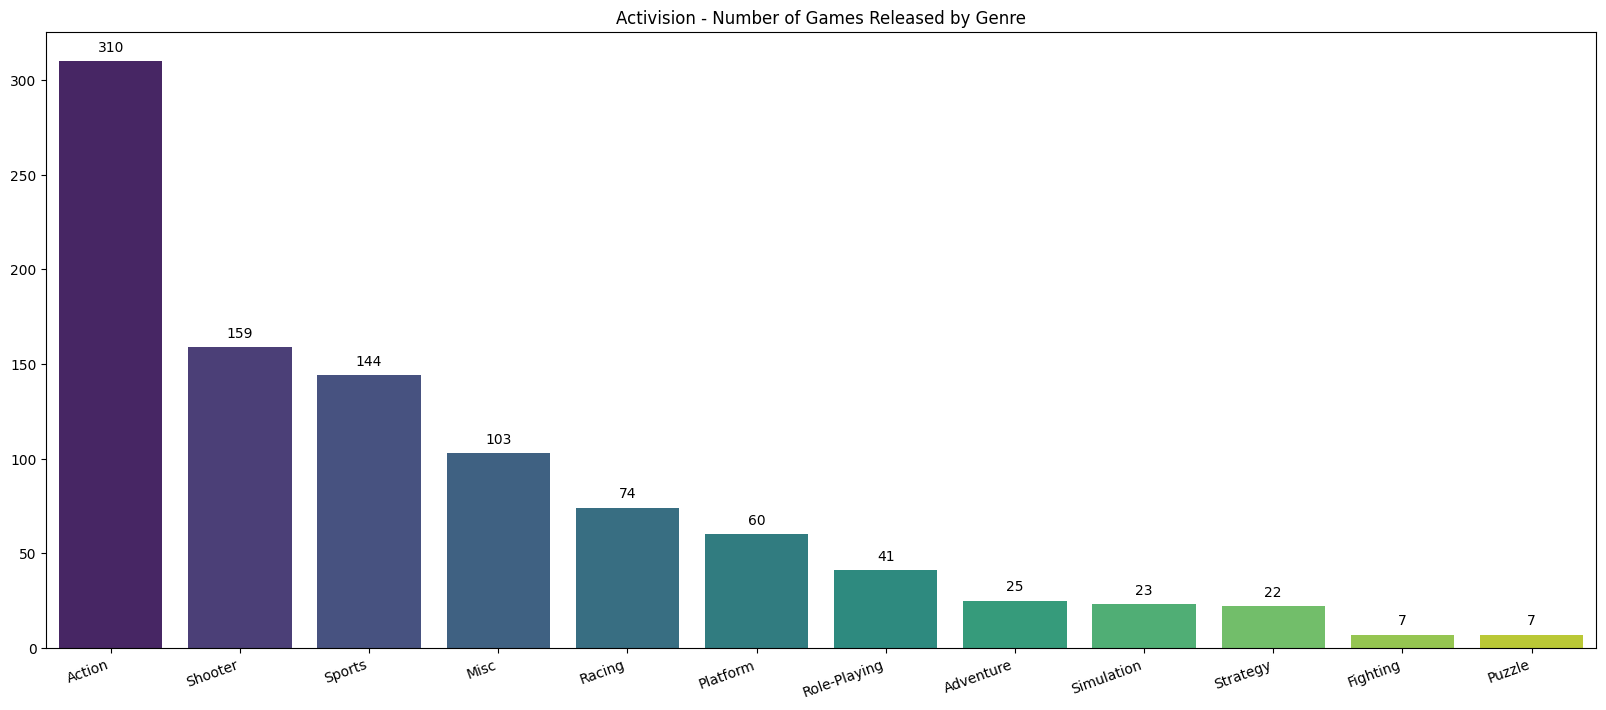

In [52]:
# filter data to get only Activision
act_rel_genre = sales_df[sales_df['Publisher'] == 'Activision']

# count the number of games per genre
act_rel_genre = act_rel_genre['Genre'].value_counts().reset_index()
act_rel_genre.columns = ['Genre', 'Name']

# rename the 'Name' column for better understandability
act_rel_genre = act_rel_genre.rename(columns={'Name': 'Games'})

# sort by the total number of games in descending order
act_rel_genre = act_rel_genre.sort_values(by='Games', ascending=False)

# make barplot
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Genre', y='Games', hue= 'Genre', data=act_rel_genre, palette="viridis")
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.title('Activision - Number of Games Released by Genre')

# add values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

### b. By Platform

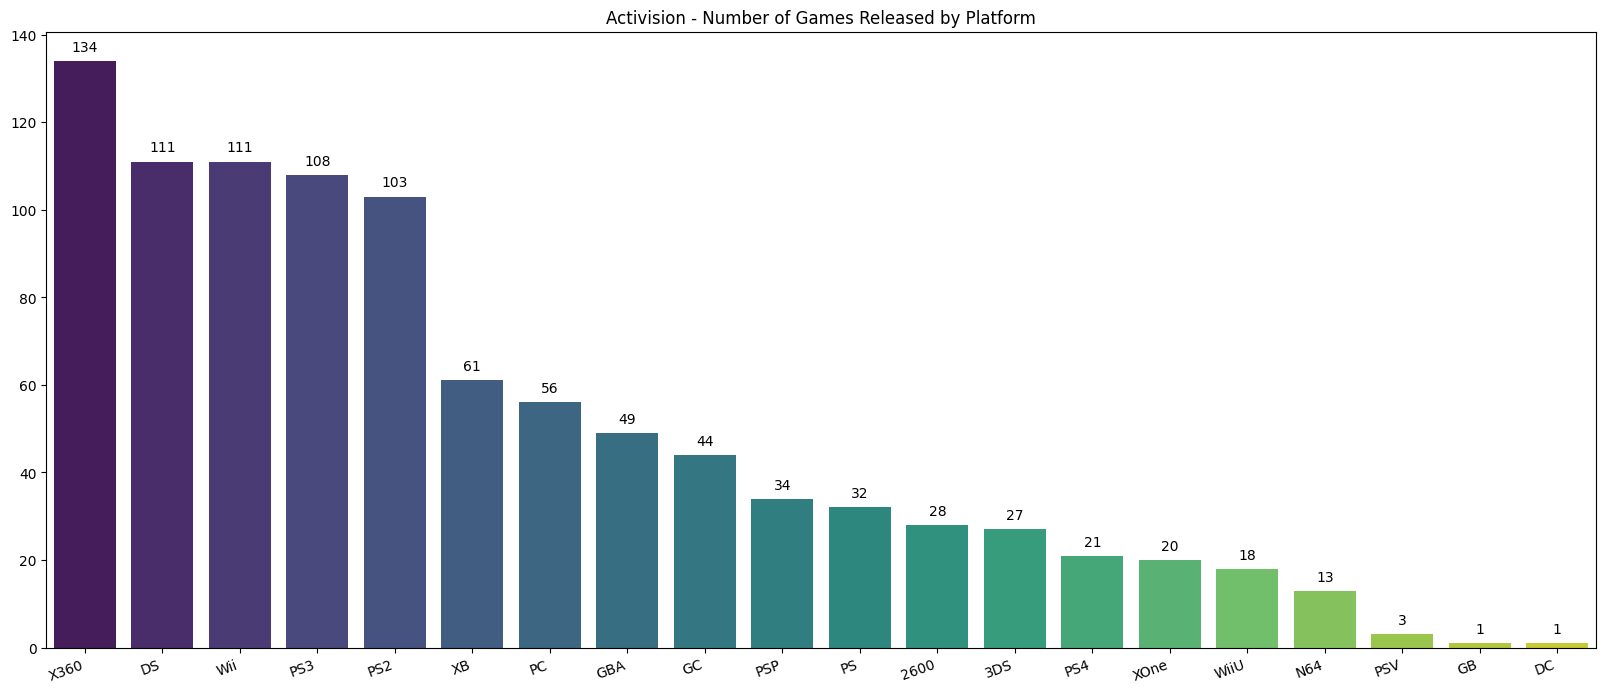

In [53]:
# filter data to get only Activision
act_rel_plat = sales_df[sales_df['Publisher'] == 'Activision']

# count the number of games per genre
act_rel_plat = act_rel_plat['Platform'].value_counts().reset_index()
act_rel_plat.columns = ['Platform', 'Name']

# rename the 'Name' column for better understandability
act_rel_plat = act_rel_plat.rename(columns={'Name': 'Games'})

# sort by the total number of games in descending order
act_rel_plat = act_rel_plat.sort_values(by='Games', ascending=False)

# make barplot
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Platform', y='Games', hue= 'Platform', data=act_rel_plat, palette="viridis")
plt.xticks(rotation=20, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.title('Activision - Number of Games Released by Platform')

# add values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

# **Conclusion**

## I. The video games market

***The industry***

The video game's industry from 1980 to 2020 has seen numbers and numbers of new games on many platforms.
   * Most of these video games do not sell much
   * However, the top percentiles have sold extremely well. We can talk about the top 3 with astonishing results:
        * Wii Sports
        * Grand Theft Auto V
        * Super Mario Bros. 

North America (NA) is the biggest market for this industry by far (almost 50% of the market shares), followed by Europe (27%) and Japan (15%).
There is a significant similarity in tastes in NA, EU and Other regions. Japan, on the other hand, shows different patterns.

***The platforms***

Many platforms have been released since the creation of video games. Some have caught on more than others
   * The top selling platforms (up until 2020) are the PlayStation 3 (PS3), the XBox 360 (X360), the PS2, the Wii and then the DS.
   * The DS and PS2 have been extremely productive (many games were released on these platforms). However, as time goes by, companies seem to focus more on quality than quantity, releasing less games overall since 2010.

***The genres***
Action games and Sports games have been the most prolific genres since 1980. Shooter games also work well anywhere except Japan, where Role-Playing games show surprisingly high performances compared to the rest of the world. 
Strategy and Adventure games are the least selling games overall.

***The main competitors***

The video game's industry is led by a clear top 3:
   * Nintendo. The Japanese company seems to focus more on quality than quantity (releases much less games than its competitors) and gets most of its profit from older games (before 2010)
   * Electronic Arts (EA) and Activision. These two American companies show the same pattern: lots of games released (top 2 most producting publishers), high market shares everywhere except Japan. They focus on one signature genre which is their main difference: EA focuses on Sports games while Activision focuses on Shooter games.

## II. Case use

### *a. As a developer*

If you are a game developer with sole objective being to sell your game, here is what to focus on:

***The platform***

Focusing on one platform only or on several at the same time does not seem to matter much as the two most selling games show both of these strategies. However, it seems reasonable to at least integrate one of the following: 
   * Playstation Series (PS3 / PS4 / PS5)
   * XBox (X360 / XBox One / XBox Series X/S)
   * Nintendo Consoles (Wii / DS / Switch)
In reality, it is important to customers tend to go for more recent consoles and simply switch from one version of the Series to the newer.

***The genre***

Action games and Sports games are the most bankable genres as they sell great everywhere in the world. A different strategy might be to focus on a high-performing niche such as Role-Playing games in Japan or Shooter games everywhere else.

***The company***

You might want to approach any of the "Big 3" depending on the market and genre that you are targetting:
   * Nintendo for Role-Playing games and/or if your objective is to enter the Japanese Market
   * EA for a more global approach and if you plan to make a Sports game
   * Activision if your strategy is to create a Shooter game.

*Note:*  It seems best to focus on making one game with great quality than trying to produce several games quickly.

### *b. As a company*

This analysis gives you insights if you are a company that tries to compete in the video game's industry. It gives you a great overview of customer's patterns in different markets, of which games and platforms to focus on with more in-depth analysis, but also an overview of the main competitor's strategy.

